<a href="https://colab.research.google.com/github/PabAleBravo/Proyectointegradorequipo14/blob/main/Avance5_Equipo14_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

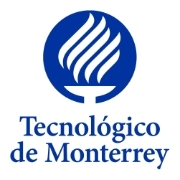


# Avance 5. Modelo Final

## Equipo 14

### A01793024 – Pablo Alejandro Bravo Vargas
### A00939319 - Brian Sánchez Hernández
### A00968460 - Josías Ruiz Peña


## Librerias

In [89]:
#Librerias

import pandas as pd
import chardet
#pip install plotly
import plotly.express as px
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
!pip install lifelines
from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from lifelines import WeibullFitter
from lifelines.utils import concordance_index
from lifelines import ExponentialFitter
from lifelines import LogNormalFitter
from lifelines.utils import concordance_index
from lifelines.utils import median_survival_times
from lifelines import LogLogisticFitter
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from lifelines.utils import k_fold_cross_validation
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline




# **Avance 1** - Análisis exploratorio de datos

## Estructura de datos

Los datos se encuentran divididos en 12 archivos .xlsx ubicados en un repositorio en Github, por lo que se requiere concatenarlos en un DataFrame para llevar a cabo la exploración de datos.

Importar Datos del archivo de muestra de la información para su análisis.

In [3]:
#Extracción de los datos

url_archivo1 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2301_Base%20Flujo.xlsx'
url_archivo2 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2302_Base%20Flujo.xlsx'
url_archivo3 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2303_Base%20Flujo.xlsx'
url_archivo4 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2304_Base%20Flujo.xlsx'
url_archivo5 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2305_Base%20Flujo.xlsx'
url_archivo6 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2306_Base%20Flujo.xlsx'
url_archivo7 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2307_Base%20Flujo.xlsx'
url_archivo8 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2308_Base%20Flujo.xlsx'
url_archivo9 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2309_Base%20Flujo.xlsx'
url_archivo10 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2310_Base%20Flujo.xlsx'
url_archivo11 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2311_Base%20Flujo.xlsx'
url_archivo12 = 'https://github.com/PabAleBravo/Proyectointegradorequipo14/raw/main/2312_Base%20Flujo.xlsx'

# Cargando el archivo
df_archivo1 = pd.read_excel(url_archivo1)
df_archivo2 = pd.read_excel(url_archivo2)
df_archivo3 = pd.read_excel(url_archivo3)
df_archivo4 = pd.read_excel(url_archivo4)
df_archivo5 = pd.read_excel(url_archivo5)
df_archivo6 = pd.read_excel(url_archivo6)
df_archivo7 = pd.read_excel(url_archivo7)
df_archivo8 = pd.read_excel(url_archivo8)
df_archivo9 = pd.read_excel(url_archivo9)
df_archivo10 = pd.read_excel(url_archivo10)
df_archivo11 = pd.read_excel(url_archivo11)
df_archivo12 = pd.read_excel(url_archivo12)

# Concatenarlo

df = pd.concat([df_archivo1, df_archivo2, df_archivo3, df_archivo4, df_archivo5, df_archivo6, df_archivo7, df_archivo8, df_archivo9, df_archivo10, df_archivo11, df_archivo12])

df.head()

,Expediente,Tiposervicio,Servicio,SubServicio,EstatusExp,FechaApertura,FechaAsignacion,Fechallegada,EntidadOrigen,MunicipioOrigen,...,LatitudExp,LongitudExp,CP,dsTipoAuto,Cl Proveedor,Fecha_AsisConcluida,Fecha_Termino,Fecha_RegisPago,FechasRegisFactura,EstatusCXP
0,18971034,EMERGENCIA,Asistencia Vial,Cambio de Llanta,Cancelado al Momento,2023-01-31,NaT,NaT,NUEVO LEON,SAN NICOLAS DE LOS GARZA,...,25.741215,-100.250260,66440.0,Rio Sedan,0,NaT,NaT,NaT,NaT,NaN
1,18971033,PAGO DIRECTO (POR CUENTAS),Siniestros,Grúas por Colisión,Concluido,2023-01-31,2023-02-01,2023-02-01,PUEBLA,AMOZOC,...,NaN,NaN,NaN,NaN,12325,NaT,NaT,NaT,NaT,NaN
2,18971032,PAGO DIRECTO (POR CUENTAS),Siniestros,Grúas por Colisión,Concluido,2023-01-31,2023-02-01,2023-02-01,PUEBLA,AMOZOC,...,NaN,NaN,NaN,NaN,12325,NaT,NaT,NaT,NaT,NaN
3,18971029,EMERGENCIA,Asistencia Vial,Arrastre de Grúa,Concluido,2023-01-31,2023-01-31,2023-02-01,BAJA CALIFORNIA,ENSENADA,...,31.902156,-116.576906,22813.0,VERSA,11890,2023-02-01,2023-02-01,NaT,2023-02-28,FACTURADO
4,18971028,CONEXION,Asistencia Vial,Arrastre de Grúa,Cancelado al Momento,2023-01-31,NaT,NaT,MEXICO,ECATEPEC DE MORELOS,...,19.622923,-99.046570,55024.0,500 Abarth,0,NaT,NaT,NaT,NaT,NaN


Guardar DataSet combiando a un archivo facilmente importable.

In [4]:
df.to_csv('/content/2023_Dataset.csv', index=False)

Forma del dataset

In [5]:
rows, columns = df.shape
print(f'El dataset contiene {rows} registros y {columns} columnas.')

El dataset contiene 491281 registros y 37 columnas.


Análisis descriptivo

In [6]:
print(df.describe())
print(df.describe(include=['object']))

         Expediente          Costo    CostoPagado       clCuenta  \
count  4.912810e+05  491281.000000  410918.000000  491281.000000   
mean   1.927413e+07    1181.533402    1224.947553    1820.570248   
std    2.127142e+05    2842.302096    2887.321078     754.435343   
min    1.891442e+07       0.000000       0.000000       7.000000   
25%    1.908687e+07     220.000000     300.000000    1213.000000   
50%    1.927282e+07     550.000000     570.000000    1796.000000   
75%    1.945871e+07    1130.930000    1149.750000    2585.000000   
max    1.964661e+07  195000.000000  195000.000000    2866.000000   

           TieneCita  ProveedorAsignado  CntMonitoreosAProveedor  \
count  491281.000000      491281.000000            491281.000000   
mean        0.035933           0.838683                 1.802046   
std         0.186122           0.367824                 2.095909   
min         0.000000           0.000000                 0.000000   
25%         0.000000           1.000000        

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491281 entries, 0 to 41799
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Expediente               491281 non-null  int64         
 1   Tiposervicio             491281 non-null  object        
 2   Servicio                 491281 non-null  object        
 3   SubServicio              491281 non-null  object        
 4   EstatusExp               491281 non-null  object        
 5   FechaApertura            491281 non-null  datetime64[ns]
 6   FechaAsignacion          412029 non-null  datetime64[ns]
 7   Fechallegada             381928 non-null  datetime64[ns]
 8   EntidadOrigen            455808 non-null  object        
 9   MunicipioOrigen          455808 non-null  object        
 10  Costo                    491281 non-null  float64       
 11  CostoPagado              410918 non-null  float64       
 12  lugardelevento   

In [8]:
# Calculando la cardinalidad de las variables
cardi = df.columns
for i in cardi:
  cardinality = df[i].nunique()
  print(f"Cardinalidad de {i}: {cardinality}")


Cardinalidad de Expediente: 491281
Cardinalidad de Tiposervicio: 15
Cardinalidad de Servicio: 2
Cardinalidad de SubServicio: 11
Cardinalidad de EstatusExp: 5
Cardinalidad de FechaApertura: 365
Cardinalidad de FechaAsignacion: 386
Cardinalidad de Fechallegada: 384
Cardinalidad de EntidadOrigen: 33
Cardinalidad de MunicipioOrigen: 1880
Cardinalidad de Costo: 33153
Cardinalidad de CostoPagado: 27657
Cardinalidad de lugardelevento: 3
Cardinalidad de EstatusProv: 4
Cardinalidad de dsBlindaje: 6
Cardinalidad de ClasificaAuto: 6
Cardinalidad de CitaProg: 2
Cardinalidad de dsTipoAsignacion: 6
Cardinalidad de importeprov: 2
Cardinalidad de Entidaddestino: 34
Cardinalidad de Municipiodestino: 1346
Cardinalidad de clCuenta: 243
Cardinalidad de TieneCita: 2
Cardinalidad de ProveedorAsignado: 2
Cardinalidad de CntMonitoreosAProveedor: 40
Cardinalidad de EspecifiqueCarga: 12607
Cardinalidad de dsMarcaAuto: 73
Cardinalidad de LatitudExp: 423243
Cardinalidad de LongitudExp: 385454
Cardinalidad de CP: 

## Análisis univariante

Para entender las características de las variables más importantes.

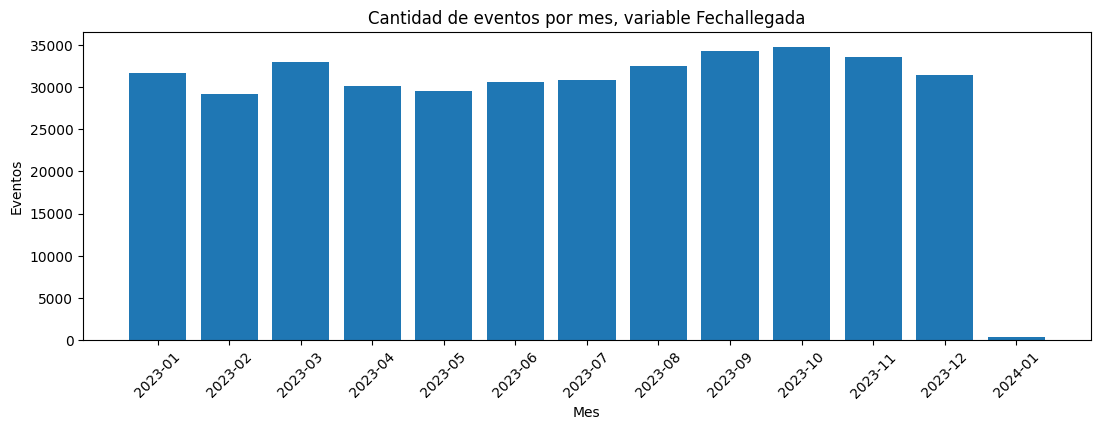

In [9]:

# Visualizando la cantidad de eventos por día de variable Fechallegada
monthly_counts = df['Fechallegada'].dt.to_period('M').value_counts().sort_index()
xs = monthly_counts.index
ys = monthly_counts.values
xss = xs.astype(str)
plt.figure(figsize=(13, 4))
plt.bar(xss, ys)
plt.xlabel('Mes')
plt.ylabel('Eventos')
plt.title('Cantidad de eventos por mes, variable Fechallegada')
plt.xticks(rotation=45)
plt.show()


count    410918.000000
mean       1224.947553
std        2887.321078
min           0.000000
25%         300.000000
50%         570.000000
75%        1149.750000
max      195000.000000
Name: CostoPagado, dtype: float64


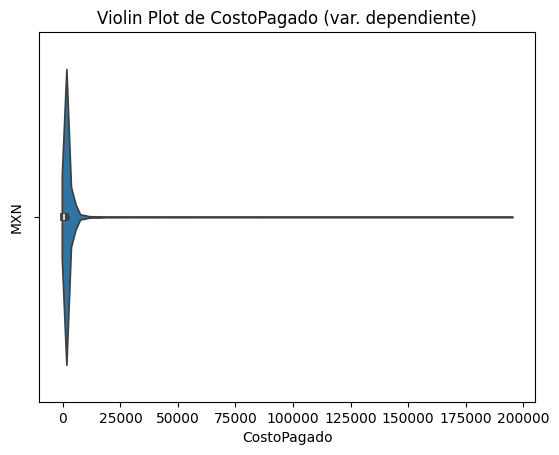

In [10]:
# Análisis descriptivo de la variable CostoPagado
description = df.CostoPagado.describe()
print(description)
sns.violinplot(data=df.CostoPagado, orient="h")
plt.title('Violin Plot de CostoPagado (var. dependiente)')
plt.ylabel('MXN')

plt.show()

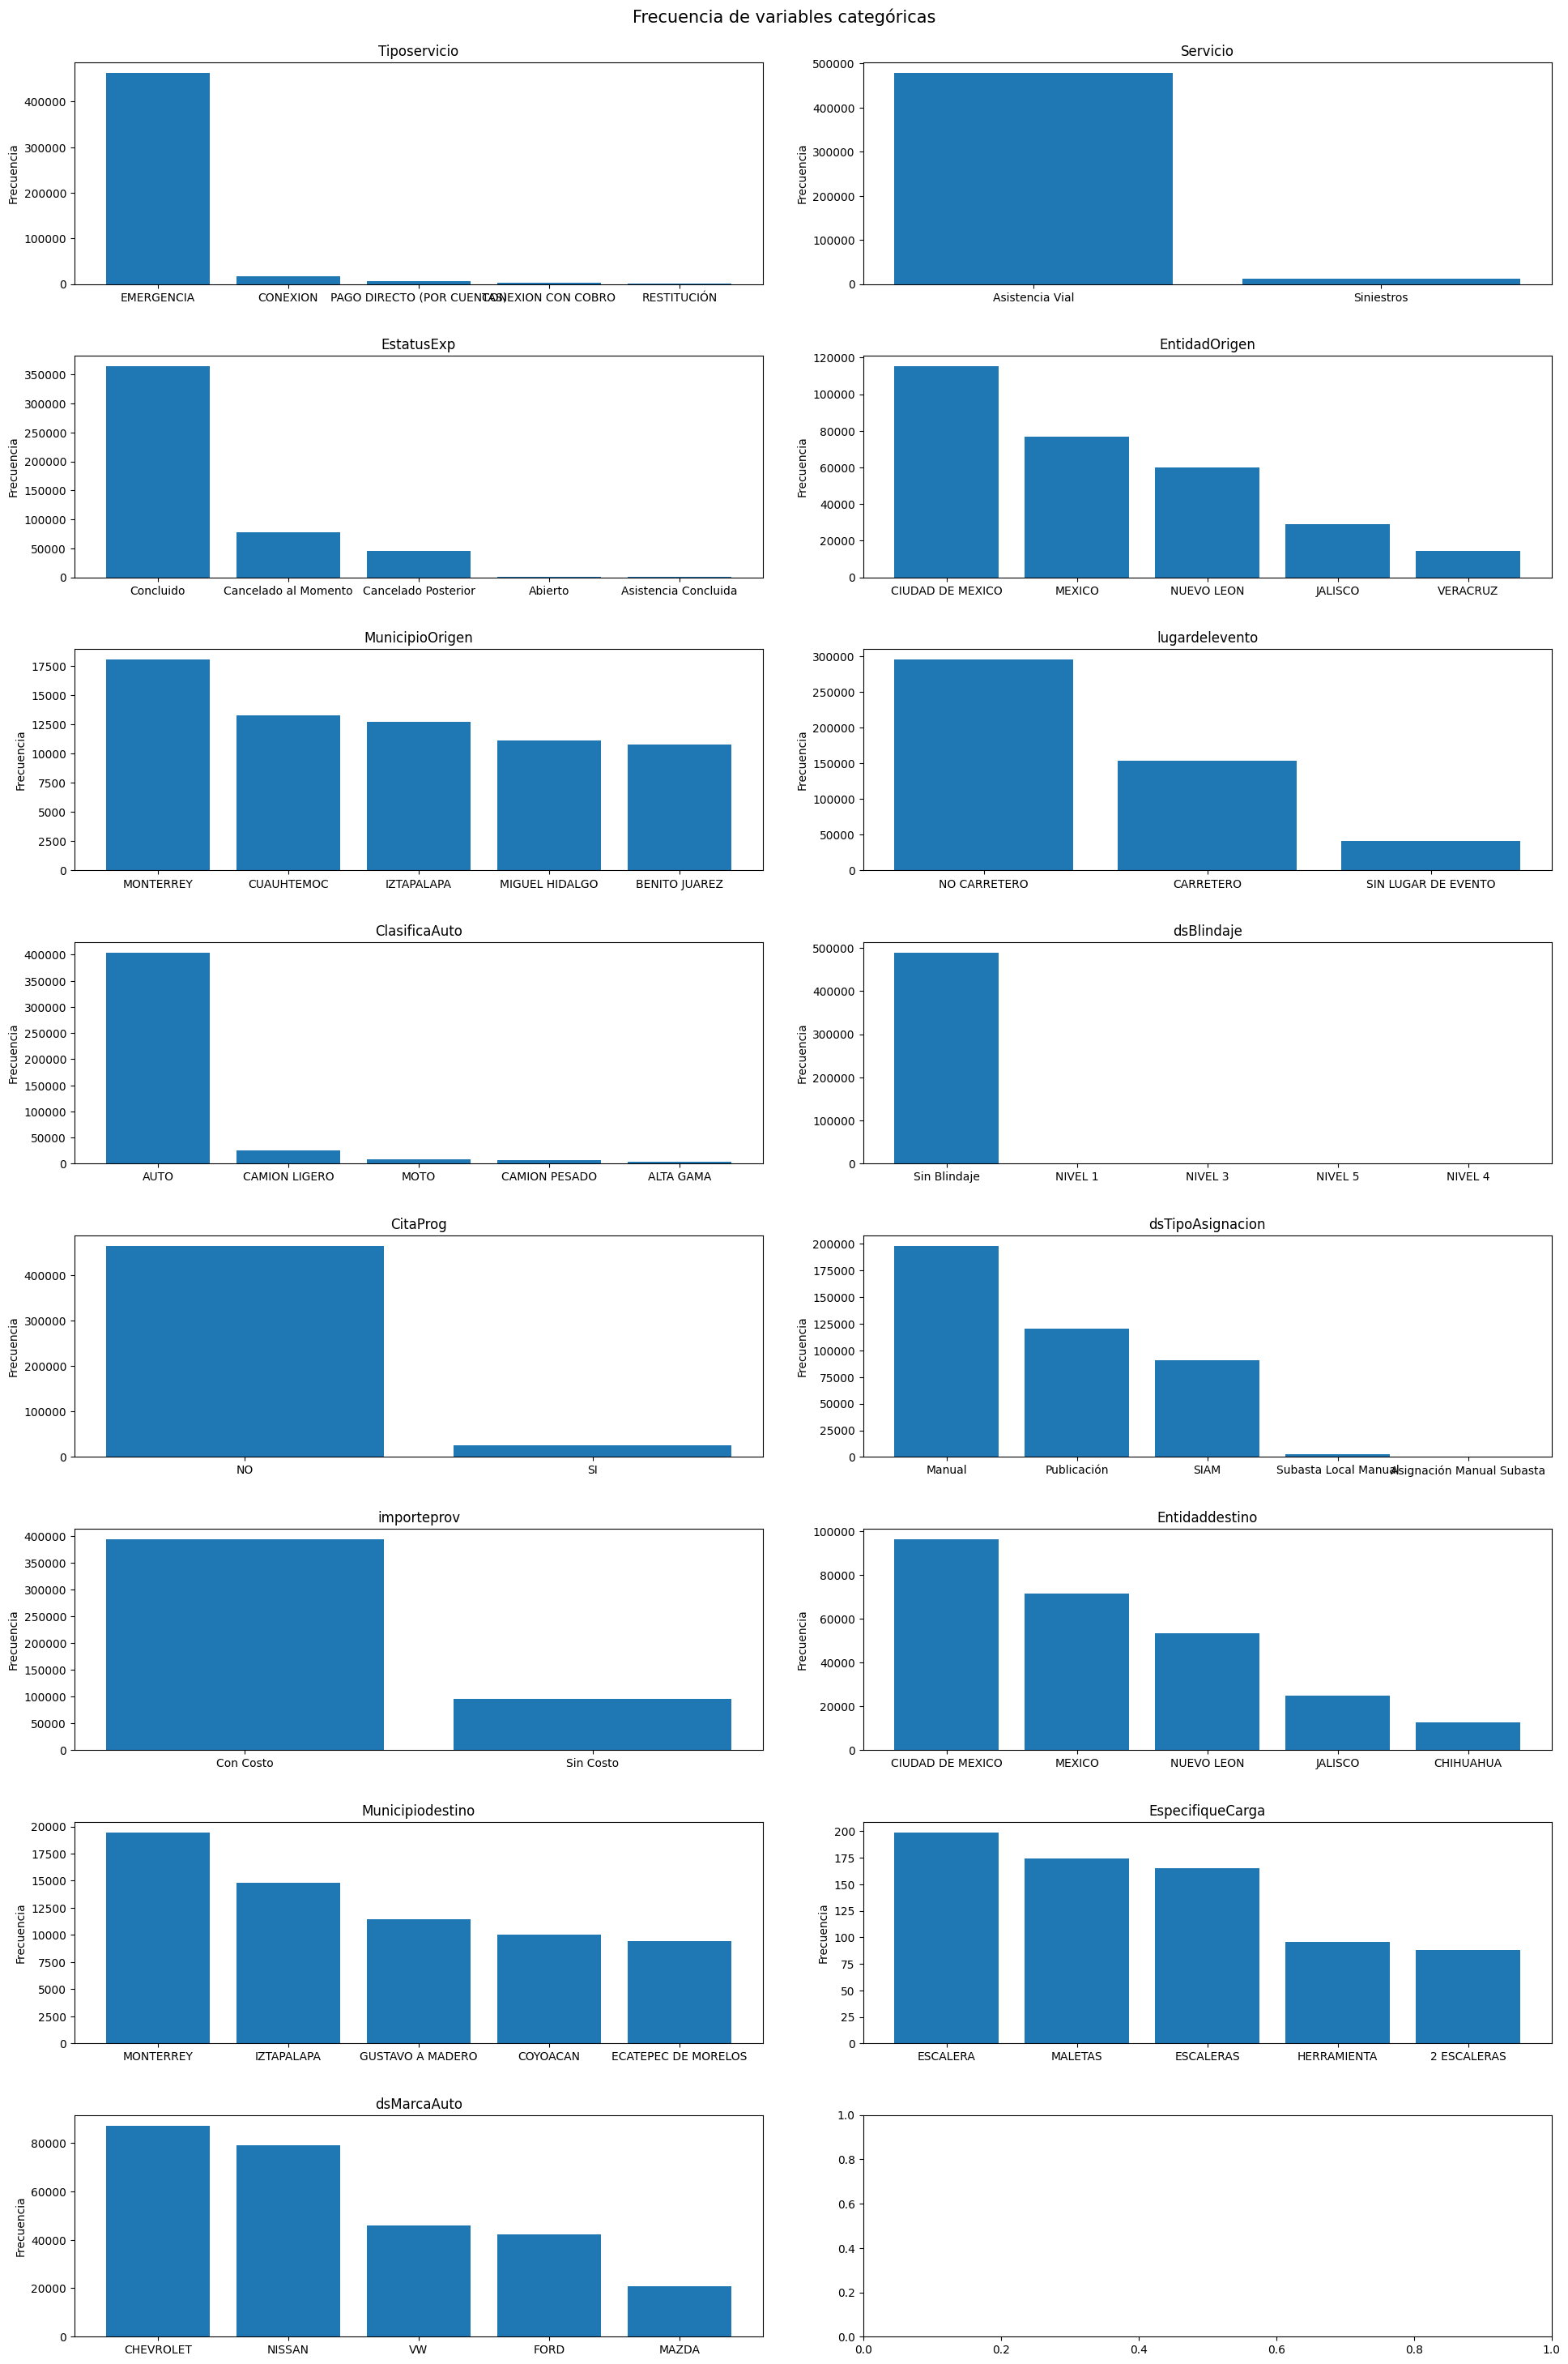

In [11]:
# Visualizando la frecuencia (top 5) de las variables categóricas

value_counts1 = df['Tiposervicio'].value_counts().nlargest(5)
value_counts2 = df['Servicio'].value_counts().nlargest(5)
value_counts3 = df['EstatusExp'].value_counts().nlargest(5)
value_counts4 = df['EntidadOrigen'].value_counts().nlargest(5)
value_counts5 = df['MunicipioOrigen'].value_counts().nlargest(5)
value_counts6 = df['lugardelevento'].value_counts().nlargest(5)
value_counts7 = df['dsBlindaje'].value_counts().nlargest(5)
value_counts8 = df['ClasificaAuto'].value_counts().nlargest(5)
value_counts9 = df['CitaProg'].value_counts().nlargest(5)
value_counts10 = df['dsTipoAsignacion'].value_counts().nlargest(5)
value_counts11 = df['importeprov'].value_counts().nlargest(5)
value_counts12 = df['Entidaddestino'].value_counts().nlargest(5)
value_counts13 = df['Municipiodestino'].value_counts().nlargest(5)
value_counts14 = df['EspecifiqueCarga'].value_counts().nlargest(5)
value_counts15 = df['dsMarcaAuto'].value_counts().nlargest(5)


fig, axs = plt.subplots(nrows=8, ncols=2, figsize=(20, 30))
fig.suptitle('Frecuencia de variables categóricas', fontsize=15, verticalalignment='top')

plt.subplots_adjust(top=25)
axs[0, 0].bar(value_counts1.index, value_counts1.values)
axs[0, 0].set_title('Tiposervicio')
axs[0, 0].set_ylabel('Frecuencia')

axs[0, 1].bar(value_counts2.index, value_counts2.values)
axs[0, 1].set_title('Servicio')
axs[0,1].set_ylabel('Frecuencia')

axs[1,0].bar(value_counts3.index, value_counts3.values)
axs[1,0].set_title('EstatusExp')
axs[1,0].set_ylabel('Frecuencia')

axs[1,1].bar(value_counts4.index, value_counts4.values)
axs[1,1].set_title('EntidadOrigen')
axs[1,1].set_ylabel('Frecuencia')

axs[2,0].bar(value_counts5.index, value_counts5.values)
axs[2,0].set_title('MunicipioOrigen')
axs[2,0].set_ylabel('Frecuencia')

axs[2,1].bar(value_counts6.index, value_counts6.values)
axs[2,1].set_title('lugardelevento')
axs[2,1].set_ylabel('Frecuencia')

axs[3,0].bar(value_counts8.index, value_counts8.values)
axs[3,0].set_title('ClasificaAuto')
axs[3,0].set_ylabel('Frecuencia')

axs[3,1].bar(value_counts7.index, value_counts7.values)
axs[3,1].set_title('dsBlindaje')
axs[3,1].set_ylabel('Frecuencia')

axs[4,0].bar(value_counts9.index, value_counts9.values)
axs[4,0].set_title('CitaProg')
axs[4,0].set_ylabel('Frecuencia')

axs[4,1].bar(value_counts10.index, value_counts10.values)
axs[4,1].set_title('dsTipoAsignacion')
axs[4,1].set_ylabel('Frecuencia')

axs[5,0].bar(value_counts11.index, value_counts11.values)
axs[5,0].set_title('importeprov')
axs[5,0].set_ylabel('Frecuencia')

axs[5,1].bar(value_counts12.index, value_counts12.values)
axs[5,1].set_title('Entidaddestino')
axs[5,1].set_ylabel('Frecuencia')

axs[6,0].bar(value_counts13.index, value_counts13.values)
axs[6,0].set_title('Municipiodestino')
axs[6,0].set_ylabel('Frecuencia')

axs[6,1].bar(value_counts14.index, value_counts14.values)
axs[6,1].set_title('EspecifiqueCarga')
axs[6,1].set_ylabel('Frecuencia')

axs[7,0].bar(value_counts15.index, value_counts15.values)
axs[7,0].set_title('dsMarcaAuto')
axs[7,0].set_ylabel('Frecuencia')


plt.tight_layout(pad=3.0)

plt.show()


In [12]:
df_X = ['Tiposervicio','Servicio','SubServicio','EstatusExp','FechaApertura','FechaAsignacion','Fechallegada','EntidadOrigen','MunicipioOrigen','Costo','lugardelevento','EstatusProv','dsBlindaje','ClasificaAuto','CitaProg','dsTipoAsignacion','importeprov','Entidaddestino','Municipiodestino','clCuenta','TieneCita','ProveedorAsignado','CntMonitoreosAProveedor','EspecifiqueCarga','dsMarcaAuto','LatitudExp','LongitudExp','CP','dsTipoAuto','Cl Proveedor','Fecha_AsisConcluida','Fecha_Termino','Fecha_RegisPago']
df_Y = ['CostoPagado']

## Análisis bi/multivariante

## Preprocesamiento

Con el fin de contar con datos de calidad que nos sirvan para su correcto análisis y modelado, es necesario implementar una serie de transformaciones para definir qué hacer con los valores nulos/faltantes y eliminar variables que no son de utilidad.

Por lo anterior, definimos una serie de reglas a implementar en el dataset.

### Aplicación de reglas

Con el fin de mejorar la calidad de la base de datos, es necesario aplicar las siguientes reglas de limpieza y manipulación de datos:

1. Tipo de Servicio: Sólo considerar 'Emergencia', ya que son los servicios que brindo un proveedor en el momento que lo solicitó un usuario.
2. Estatus: Quitar los servicios Cancelado al Momento, por que no se asignó un proveedor y por lo tanto no generan un costo.
3. Estatus Proveedor: Quitar los NULL por que no se asigno un proveedor.
4. Eliminar los servicios de Siniestrios
5. Especifique Carga: Es un campo que sirve sólo para algunas cuentas por lo que esta casi siempre vacio
6. Sí el campo Entidad/Municipio destino esta vació se debe colocar Entidad/Municipio Origen, por que muchos de los servicios que son en el mismo origen a los coordinadores se les olvida llenar este campo.
7. Si el campo Lugar del Evento esta vacio, realizar esta regla, si Entidad Origen y Entidad Destino son iguales, el servicio es NO CARRETERO, sí Entidad Origen y Entidad Destino son diferentes, el servicio es CARRETERO, los faltantes son NO CARRETEROS

In [13]:
#Dataframe para limpieza
df_clean = df

In [14]:

# Aplicación Regla 1
df_clean = df_clean[df_clean["Tiposervicio"] == "EMERGENCIA"]

# Aplicación Regla 2
df_clean = df_clean[df_clean["EstatusExp"] != "Cancelado al Momento"]

# Aplicación Regla 3
df_clean = df_clean[df_clean["EstatusProv"] != "NULL"]

# Aplicación Regla 4
df_clean = df_clean[df_clean["Servicio"] != "Siniestros"]

# Aplicación Regla 5
columnas = ["EspecifiqueCarga"]
df_clean = df_clean.drop(columns=columnas, errors='ignore')

# Aplicación Regla 6

df_clean['Municipiodestino'] = df_clean['Municipiodestino'].fillna(df_clean['MunicipioOrigen'])
df_clean['Entidaddestino'] = df_clean['Entidaddestino'].fillna(df_clean['EntidadOrigen'])

# Aplicación Regla 7

def replace_lugarevento(row):
    if row['EntidadOrigen'] == row['Entidaddestino']:
        return 'NO CARRETERO'
    else:
        return 'CARRETERO'

df_clean['lugardelevento'] = df_clean['lugardelevento'].fillna(df_clean.apply(replace_lugarevento, axis=1))

valoresfaltantes= df_clean.isnull().sum()
valoresfaltantes

Expediente                      0
Tiposervicio                    0
Servicio                        0
SubServicio                     0
EstatusExp                      0
FechaApertura                   0
FechaAsignacion                53
Fechallegada                28214
EntidadOrigen                  12
MunicipioOrigen                12
Costo                           0
CostoPagado                   651
lugardelevento                  0
EstatusProv                    55
dsBlindaje                      0
ClasificaAuto                  12
CitaProg                        0
dsTipoAsignacion               53
importeprov                     0
Entidaddestino                 12
Municipiodestino               12
clCuenta                        0
TieneCita                       0
ProveedorAsignado               0
CntMonitoreosAProveedor         0
dsMarcaAuto                   189
LatitudExp                    495
LongitudExp                   495
CP                           1533
dsTipoAuto    

In [15]:
rows, columns = df.shape
print(f'El dataset base contiene {rows} registros y {columns} columnas.')
rows, columns = df_clean.shape
print(f'El dataset limpio contiene {rows} registros y {columns} columnas.')

El dataset base contiene 491281 registros y 37 columnas.
El dataset limpio contiene 393920 registros y 36 columnas.


Convertir tipo de variables

In [16]:
df_labels = df_clean.columns.tolist()
print(df_labels)

['Expediente', 'Tiposervicio', 'Servicio', 'SubServicio', 'EstatusExp', 'FechaApertura', 'FechaAsignacion', 'Fechallegada', 'EntidadOrigen', 'MunicipioOrigen', 'Costo', 'CostoPagado', 'lugardelevento', 'EstatusProv', 'dsBlindaje', 'ClasificaAuto', 'CitaProg', 'dsTipoAsignacion', 'importeprov', 'Entidaddestino', 'Municipiodestino', 'clCuenta', 'TieneCita', 'ProveedorAsignado', 'CntMonitoreosAProveedor', 'dsMarcaAuto', 'LatitudExp', 'LongitudExp', 'CP', 'dsTipoAuto', 'Cl Proveedor', 'Fecha_AsisConcluida', 'Fecha_Termino', 'Fecha_RegisPago', 'FechasRegisFactura', 'EstatusCXP']


In [17]:
df_labels = ['Expediente','Tiposervicio','Servicio','SubServicio','EstatusExp','FechaApertura','FechaAsignacion','Fechallegada','EntidadOrigen','MunicipioOrigen','Costo','CostoPagado','lugardelevento','EstatusProv','dsBlindaje','ClasificaAuto','CitaProg','dsTipoAsignacion','importeprov','Entidaddestino','Municipiodestino','clCuenta','TieneCita','ProveedorAsignado','CntMonitoreosAProveedor','EspecifiqueCarga','dsMarcaAuto','LatitudExp','LongitudExp','CP','dsTipoAuto','Cl Proveedor','Fecha_AsisConcluida','Fecha_Termino','Fecha_RegisPago','EstatusCXP']

In [18]:
df_column_time = ['FechaApertura','FechaAsignacion','Fechallegada','Fecha_Termino','Fecha_AsisConcluida','FechasRegisFactura']
for col in df_column_time:
    print(col)
    df_clean[col] = pd.to_datetime(df_clean[col], format='%d/%m/%Y')


FechaApertura
FechaAsignacion
Fechallegada
Fecha_Termino
Fecha_AsisConcluida
FechasRegisFactura


In [19]:
df_column_date = ['Fecha_RegisPago']
for col in df_column_date:
    print(col)
    #clean integers in date column
    df_clean.loc[df_clean[col].notnull() & df_clean[col].astype(str).str.isdigit(), col] = pd.NA
    df_clean[col] = pd.to_datetime(df_clean[col], format='%Y-%m-%d')

Fecha_RegisPago


In [20]:
df_clean.loc[df_clean['CitaProg'] == 'NO', 'CitaProg'] = 0
df_clean.loc[df_clean['CitaProg'] == 'SI', 'CitaProg'] = 1

In [21]:
df_clean.loc[df_clean['importeprov'] == 'Con Costo', 'importeprov'] = 1
df_clean.loc[df_clean['importeprov'] == 'Sin Costo', 'importeprov'] = 0

In [22]:
df_column_bin = ['CitaProg','importeprov','TieneCita','ProveedorAsignado']
for col in df_column_bin:
    print(col)
    df_clean[col] = df_clean[col].astype(bool)

CitaProg
importeprov
TieneCita
ProveedorAsignado


In [23]:
df_column_class = ['Tiposervicio','Servicio','SubServicio','EstatusExp','EntidadOrigen','MunicipioOrigen','lugardelevento','EstatusProv','dsBlindaje','ClasificaAuto','dsTipoAsignacion','Entidaddestino','Municipiodestino','dsMarcaAuto','EstatusCXP']
for col in df_column_class:
    print(col+'_index')
    df_clean[col+'_index'] = pd.factorize(df_clean[col])[0]

#lista de categorias indexadas
df_column_class_index = [item + '_index' for item in df_column_class]

Tiposervicio_index
Servicio_index
SubServicio_index
EstatusExp_index
EntidadOrigen_index
MunicipioOrigen_index
lugardelevento_index
EstatusProv_index
dsBlindaje_index
ClasificaAuto_index
dsTipoAsignacion_index
Entidaddestino_index
Municipiodestino_index
dsMarcaAuto_index
EstatusCXP_index


In [24]:
#Limpieza de valores nulos con 0 y que no afectan a al modelo
df_clean['CP'].fillna(0, inplace=True)
df_clean['Costo'].fillna(0, inplace=True)
df_clean['CostoPagado'].fillna(0, inplace=True)

In [25]:
df_column_cost = ['Costo','CostoPagado']

In [26]:
df_column_int = ['Expediente','clCuenta','CntMonitoreosAProveedor','CP','Cl Proveedor']
for col in df_column_int:
    print(col)
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce').astype(int)

Expediente
clCuenta
CntMonitoreosAProveedor
CP
Cl Proveedor


In [27]:
df_label_processed = df_column_time+df_column_date+df_column_bin+df_column_class_index+df_column_int+df_column_cost
df_label_processed

['FechaApertura',
 'FechaAsignacion',
 'Fechallegada',
 'Fecha_Termino',
 'Fecha_AsisConcluida',
 'FechasRegisFactura',
 'Fecha_RegisPago',
 'CitaProg',
 'importeprov',
 'TieneCita',
 'ProveedorAsignado',
 'Tiposervicio_index',
 'Servicio_index',
 'SubServicio_index',
 'EstatusExp_index',
 'EntidadOrigen_index',
 'MunicipioOrigen_index',
 'lugardelevento_index',
 'EstatusProv_index',
 'dsBlindaje_index',
 'ClasificaAuto_index',
 'dsTipoAsignacion_index',
 'Entidaddestino_index',
 'Municipiodestino_index',
 'dsMarcaAuto_index',
 'EstatusCXP_index',
 'Expediente',
 'clCuenta',
 'CntMonitoreosAProveedor',
 'CP',
 'Cl Proveedor',
 'Costo',
 'CostoPagado']

In [28]:
df_col_class = [i for i in df_labels if i not in df_label_processed+df_column_class]
df_col_class

['EspecifiqueCarga', 'LatitudExp', 'LongitudExp', 'dsTipoAuto']

Descartamos estas 4 variables por errores en la información proporcionada desde la fuente.

In [29]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393920 entries, 3 to 41799
Data columns (total 51 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Expediente               393920 non-null  int64         
 1   Tiposervicio             393920 non-null  object        
 2   Servicio                 393920 non-null  object        
 3   SubServicio              393920 non-null  object        
 4   EstatusExp               393920 non-null  object        
 5   FechaApertura            393920 non-null  datetime64[ns]
 6   FechaAsignacion          393867 non-null  datetime64[ns]
 7   Fechallegada             365706 non-null  datetime64[ns]
 8   EntidadOrigen            393908 non-null  object        
 9   MunicipioOrigen          393908 non-null  object        
 10  Costo                    393920 non-null  float64       
 11  CostoPagado              393920 non-null  float64       
 12  lugardelevento   

In [30]:
df_clean.nunique()

Expediente                 393920
Tiposervicio                    1
Servicio                        1
SubServicio                     5
EstatusExp                      4
FechaApertura                 365
FechaAsignacion               367
Fechallegada                  368
EntidadOrigen                  33
MunicipioOrigen              1815
Costo                       32071
CostoPagado                 26649
lugardelevento                  3
EstatusProv                     4
dsBlindaje                      6
ClasificaAuto                   6
CitaProg                        2
dsTipoAsignacion                6
importeprov                     2
Entidaddestino                 33
Municipiodestino             1284
clCuenta                      184
TieneCita                       2
ProveedorAsignado               2
CntMonitoreosAProveedor        40
dsMarcaAuto                    73
LatitudExp                 367755
LongitudExp                334690
CP                          18811
dsTipoAuto    

In [31]:
df_clean.head()

,Expediente,Tiposervicio,Servicio,SubServicio,EstatusExp,FechaApertura,FechaAsignacion,Fechallegada,EntidadOrigen,MunicipioOrigen,...,MunicipioOrigen_index,lugardelevento_index,EstatusProv_index,dsBlindaje_index,ClasificaAuto_index,dsTipoAsignacion_index,Entidaddestino_index,Municipiodestino_index,dsMarcaAuto_index,EstatusCXP_index
3,18971029,EMERGENCIA,Asistencia Vial,Arrastre de Grúa,Concluido,2023-01-31,2023-01-31,2023-02-01,BAJA CALIFORNIA,ENSENADA,...,0,0,0,0,0,0,0,0,0,0
5,18971026,EMERGENCIA,Asistencia Vial,Arrastre de Grúa,Concluido,2023-01-31,2023-02-01,2023-02-01,NUEVO LEON,GUADALUPE,...,1,0,0,0,0,0,1,1,1,0
6,18971025,EMERGENCIA,Asistencia Vial,Arrastre de Grúa,Concluido,2023-01-31,2023-01-31,2023-02-01,GUANAJUATO,LEON,...,2,0,0,0,0,0,2,2,2,0
7,18971024,EMERGENCIA,Asistencia Vial,Arrastre de Grúa,Concluido,2023-01-31,2023-01-31,2023-02-01,CIUDAD DE MEXICO,BENITO JUAREZ,...,3,0,0,0,0,1,3,3,3,0
8,18971023,EMERGENCIA,Asistencia Vial,Arrastre de Grúa,Concluido,2023-01-31,2023-02-01,2023-02-01,TABASCO,CUNDUACAN,...,4,1,0,1,0,0,4,4,4,1


In [32]:
df_analysis = pd.DataFrame()
for col in df_label_processed:
  df_analysis[col] = df_clean[col]
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393920 entries, 3 to 41799
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   FechaApertura            393920 non-null  datetime64[ns]
 1   FechaAsignacion          393867 non-null  datetime64[ns]
 2   Fechallegada             365706 non-null  datetime64[ns]
 3   Fecha_Termino            392619 non-null  datetime64[ns]
 4   Fecha_AsisConcluida      393865 non-null  datetime64[ns]
 5   FechasRegisFactura       244397 non-null  datetime64[ns]
 6   Fecha_RegisPago          169590 non-null  datetime64[ns]
 7   CitaProg                 393920 non-null  bool          
 8   importeprov              393920 non-null  bool          
 9   TieneCita                393920 non-null  bool          
 10  ProveedorAsignado        393920 non-null  bool          
 11  Tiposervicio_index       393920 non-null  int64         
 12  Servicio_index   

Guardar dataset para analisis

In [33]:
df_analysis.to_csv('/content/2023_Analysis_Dataset.csv', index=False)

## Conclusiones Avance 1


El análisis exploratorio de datos (EDA) nos permitió entender las características clave de nuestro dataset. Mediante técnicas estadísticas y visuales, como histogramas y el cálculo de cardinalidad, analizamos y comprendimos los datos.

¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia? `

Se implementaron reglas de negocio específicas para mitigar la incidencia de datos incompletos o ausentes, lo que nos ayudo significativamente a mejorar la calidad del conjunto de datos. Una de los cambios más notables fue la identificación de errores, inconsistencias y valores nulos en las variables 'EntidadDestino' y 'MunicipioDestino'. Para cambiar este problema, el área de operaciónes nos indicó que este comportamiento es un error tipo en la operación: los valores faltantes en estas variables fueron reemplazados por los correspondientes de 'EntidadOrigen' y 'MunicipioOrigen'. Ya que, habitualmente, los coordinadores no completan los campos de destino cuando el servicio se lleva a cabo en el mismo lugar de origen.

¿Cuáles son las estadísticas resumidas del conjunto de datos?

El conjunto de datos contiene un total de 491,281 registros, abarcando 37 columnas distintas. Estos registros representan todos los servicios de asistencia vial prestados durante el año 2023. Sin embargo, tras la aplicación de reglas de negocio para mejorar la relevancia de los datos, la base se redujo a 393,865 registros. Este proceso de filtrado asegura que el análisis se centre en los datos más pertinentes. Se presentan en promedio 30,000 a 35,000 servicios mensuales, en el cual se destaca el subservicio de arrastre de grúa ya que es el más utilizado, el cual representa el 87% de los servicios de asistencia vial. Además, el 68% de estos servicios son clasificados como 'No carreteros', lo que indica una predominancia de servicios en zonas urbanas. En cuanto a los costos, el análisis muestra que el costo promedio de los servicios de asistencia vial es de 1,224 pesos mexicanos. Sin embargo, es importante señalar que en el 75% de los casos, el costo promedio es menor a 1,149 pesos mexicanos. Esta distribución de costos proporciona una visión valiosa sobre la estructura de precios de los servicios y será un factor clave cuando calculemos el monto del flujo de efectivo y las proyección de pago a los proveedores.

¿Hay valores atípicos en el conjunto de datos?

En el análisis descriptivo de la variable 'CostoPagado', notamos un sesgo significativo y la presencia de numerosos outliers. Existen servicios con costo de 195,000 pesos mexicanos, que por el tipo de servicios podrían ser errores o servicios que requirieron de alguna complejidad mayor. Tendremos que analizarlo, para el pronóstico del costo de los servicios abiertos.

¿Cuál es la cardinalidad de las variables categóricas?

Las principales variables cuenta con la siguiente cardinalidad una vez aplicado las reglas de negocio:

Cardinalidad de SubServicio: 5
Cardinalidad de EstatusExp: 4
Cardinalidad de lugardelevento: 2
Cardinalidad de EstatusProv: 4
Cardinalidad de ClasificaAuto: 6
Cardinalidad de CitaProg: 2
Cardinalidad de dsTipoAsignacion: 6
Cardinalidad de TieneCita: 2
Cardinalidad de dsMarcaAuto: 73
Cardinalidad de EstatusCXP: 2
¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?

Realizamos el análisis de sesgo para la variable númerica del costo, en el cual obtuvimos un resultado de asimetria del 14.98, este es un valor muy alto, lo que indica un sesgo extremadamente fuerte hacia la derecha y una cola larga hacia la derecha sugiere la presencia de valores extremadamente altos en comparación con el resto de los datos.

Al aplicar la transformación logarítmica, la asimetría se ha reducido significativamente, pero nos dió negativa. Lo que significa que la transformación ha sobreajustado la corrección del sesgo original, creando una nueva distribución con una cola larga hacia la izquierda, por lo que debemos de buscar otro tipo de transformación.

La transformación de Box-Cox nos dió una asimetría del -0.08, Esta asimetría es muy cerca de cero, lo que sugiere que la distribución de tus datos transformados es ahora aproximadamente normal.

¿Hay correlación entre las variables dependientes e independientes?

No existe una estrecha relación particular entre el costo y las variables dependientes, lo que suguiere que el costo se determina por más de una variable.

¿Cómo se distribuyen los datos en función de diferentes categorías?

En el análisis de la distribución de los datos se utilizaron histogramas para obtener una visualización de las diferentes categorías. El servicio más utilizado es el arrastre de grúa, además, se observó que la mayoría de los servicios son clasificados como 'No Carreteros'.

Otro aspecto fue que predominaron los servicios brindados en la Ciudad de México (CDMX), particularmente a vehículos particulares. Entre las marcas de automóviles, Chevrolet y Nissan.

El análisis de datos nos permitió conocer cuáles son los tipos de servicios más frecuentes, en qué entidades se generan la mayor cantidad de servicios, los costos por tipo de servicio, los tipos de vehículos que más servicios demandan, entre otra información de gran importancia a la hora de estimar los costos por pagar.


# **Avance 2** - Ingeniería de características

## Construcción

Vamos agregar al duración de cada etapa y los eventos censurados

In [34]:
df_analysis['FechaApertura'] = pd.to_datetime(df_analysis['FechaApertura'])
df_analysis['Fecha_AsisConcluida'] = pd.to_datetime(df_analysis['Fecha_AsisConcluida'])
df_analysis['Fecha_Termino'] = pd.to_datetime(df_analysis['Fecha_Termino'])
df_analysis['FechasRegisFactura'] = pd.to_datetime(df_analysis['FechasRegisFactura'])

# Calculando la duración en días para cada etapa
df_analysis['DuracionEtapa1'] = (df_analysis['Fecha_AsisConcluida'] - df_analysis['FechaApertura']).dt.days
df_analysis['DuracionEtapa2'] = (df_analysis['Fecha_Termino'] - df_analysis['Fecha_AsisConcluida']).dt.days
df_analysis['DuracionEtapa3'] = (df_analysis['FechasRegisFactura'] - df_analysis['Fecha_Termino']).dt.days

# Identificando registros censurados
df_analysis['Censurado1'] = df_analysis['Fecha_AsisConcluida'].notna().astype(int)
df_analysis['Censurado2'] = df_analysis['Fecha_Termino'].notna().astype(int)
df_analysis['Censurado3'] = df_analysis['FechasRegisFactura'].notna().astype(int)

# Mostrando las primeras filas para verificar los cálculos
df_analysis[['DuracionEtapa1', 'Censurado1', 'DuracionEtapa2', 'Censurado2', 'DuracionEtapa3', 'Censurado3']].head()

,DuracionEtapa1,Censurado1,DuracionEtapa2,Censurado2,DuracionEtapa3,Censurado3
3,1.0,1,0.0,1,27.0,1
5,1.0,1,2.0,1,28.0,1
6,1.0,1,5.0,1,23.0,1
7,1.0,1,1.0,1,26.0,1
8,3.0,1,20.0,1,NaN,0


In [35]:
# Análisis de correlación
correlation_matrix = df_analysis.corr(method='spearman')
print(correlation_matrix)


<ipython-input-35-ef4e6cf27b9e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_analysis.corr(method='spearman')


                         CitaProg  importeprov  TieneCita  ProveedorAsignado  \
CitaProg                 1.000000    -0.063370   0.849940           0.001923   
importeprov             -0.063370     1.000000  -0.059268           0.063967   
TieneCita                0.849940    -0.059268   1.000000           0.002441   
ProveedorAsignado        0.001923     0.063967   0.002441           1.000000   
Tiposervicio_index            NaN          NaN        NaN                NaN   
Servicio_index                NaN          NaN        NaN                NaN   
SubServicio_index       -0.058658    -0.004535  -0.059523          -0.001859   
EstatusExp_index         0.045178    -0.495874   0.028643          -0.034293   
EntidadOrigen_index      0.078881    -0.027246   0.087398           0.002003   
MunicipioOrigen_index    0.096761    -0.029086   0.105256           0.001510   
lugardelevento_index     0.089826     0.017983   0.095185          -0.005940   
EstatusProv_index        0.065949    -0.

In [36]:
# Lista de covariables elegidas

df_analysis['Número de Semana'] = df_analysis['FechaApertura'].dt.isocalendar().week
df_analysis['Número de Semana'] = df_analysis['Número de Semana'].astype('int64')

selected_covariables = ['Número de Semana','Costo', 'TieneCita', 'EntidadOrigen_index', 'lugardelevento_index', 'SubServicio_index']

# Añadiendo las variables de tiempo y censura a la lista
selected_columns = selected_covariables + ['DuracionEtapa1', 'Censurado1', 'DuracionEtapa2', 'Censurado2', 'DuracionEtapa3', 'Censurado3']

# Creando un nuevo DataFrame solo con las columnas seleccionadas
df_selected = df_analysis[selected_columns].copy()

df_selected['TieneCita'] = df_selected['TieneCita'].astype(int)

# Mostrando las primeras filas del nuevo DataFrame para verificar
print(df_selected.head())

   Número de Semana   Costo  TieneCita  EntidadOrigen_index  \
3                 5   635.0          1                    0   
5                 5   550.0          0                    1   
6                 5  1170.0          1                    2   
7                 5   516.0          0                    3   
8                 5  4393.0          0                    4   

   lugardelevento_index  SubServicio_index  DuracionEtapa1  Censurado1  \
3                     0                  0             1.0           1   
5                     0                  0             1.0           1   
6                     0                  0             1.0           1   
7                     0                  0             1.0           1   
8                     1                  0             3.0           1   

   DuracionEtapa2  Censurado2  DuracionEtapa3  Censurado3  
3             0.0           1            27.0           1  
5             2.0           1            28.0           

In [37]:
# Continuando con la ejecución para completar el procedimiento

# Seleccionando las covariables elegidas y las columnas de duración y censura
selected_covariables = ['Número de Semana','Costo', 'TieneCita', 'EntidadOrigen_index', 'lugardelevento_index', 'SubServicio_index']
selected_columns = selected_covariables + ['DuracionEtapa1', 'Censurado1', 'DuracionEtapa2', 'Censurado2', 'DuracionEtapa3', 'Censurado3']

# Creando un nuevo DataFrame con las columnas seleccionadas
df_selected = df_analysis[selected_columns].copy()


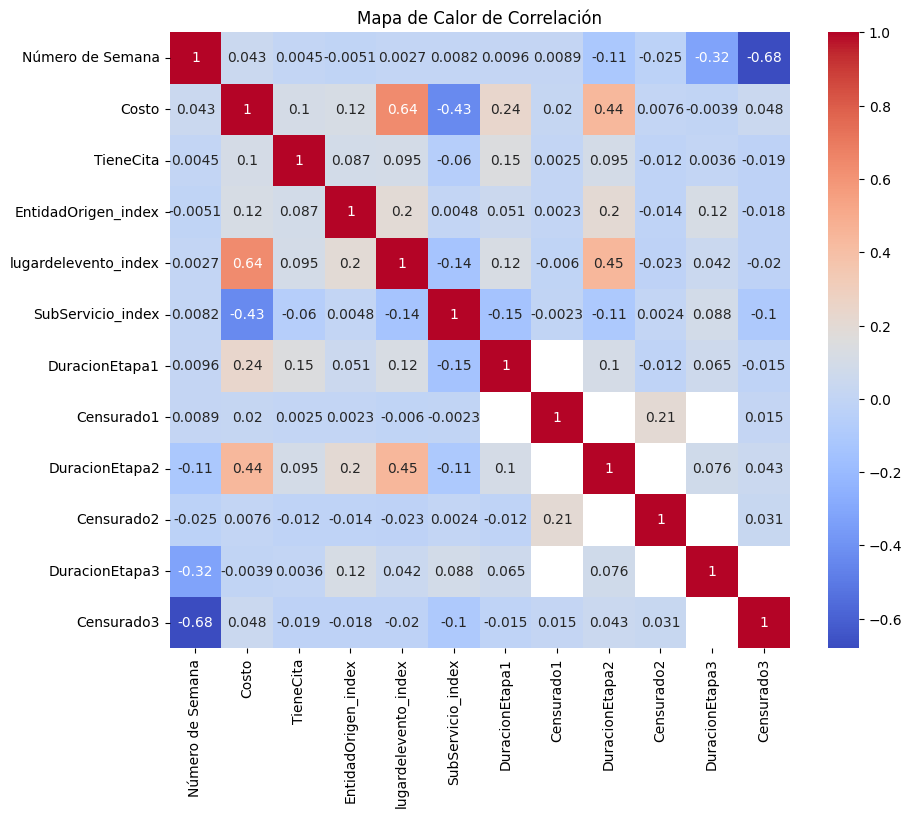

In [38]:
correlation_matrix = df_selected.corr(method='spearman')

# Visualizando la correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Mapa de Calor de Correlación")
plt.show()

In [39]:
# Contar valores NaN en cada columna de interés
nan_counts_etapa1 = df_selected['DuracionEtapa1'].isna().sum()
nan_counts_etapa2 = df_selected['DuracionEtapa2'].isna().sum()
nan_counts_etapa3 = df_selected['DuracionEtapa3'].isna().sum()

# Imprimir los resultados
print(f"Valores NaN en DuracionEtapa1: {nan_counts_etapa1}")
print(f"Valores NaN en DuracionEtapa2: {nan_counts_etapa2}")
print(f"Valores NaN en DuracionEtapa3: {nan_counts_etapa3}")

Valores NaN en DuracionEtapa1: 55
Valores NaN en DuracionEtapa2: 1301
Valores NaN en DuracionEtapa3: 149986


In [40]:
print((df_selected['DuracionEtapa2'] <= 0).sum())

103071


In [41]:
# Cambiamos los <= 0 por la media de la duración en DuracionEtapa2
media_etapa2 = df_selected.loc[df_selected['DuracionEtapa2'] > 0, 'DuracionEtapa2'].mean()
df_selected.loc[df_selected['DuracionEtapa2'] <= 0, 'DuracionEtapa2'] = media_etapa2

# Imputación simple para DuracionEtapa3 utilizando la mediana
mediana_etapa3 = df_selected['DuracionEtapa3'].median()
df_selected['DuracionEtapa3'].fillna(mediana_etapa3, inplace=True)

## Normalización

Análisis de Asimetría

In [42]:
asimetria = df_selected.skew()
print(asimetria)

Número de Semana        -0.047859
Costo                   17.265444
TieneCita                4.541210
EntidadOrigen_index      1.381113
lugardelevento_index     0.751570
SubServicio_index        3.164195
DuracionEtapa1           9.150854
Censurado1             -84.612271
DuracionEtapa2           3.075461
Censurado2             -17.314389
DuracionEtapa3           6.246084
Censurado3              -0.496303
dtype: float64


In [43]:
#Log

df_selected['Costo_log'] = np.log1p(df_selected['Costo'])
df_selected['DuracionEtapa1_log'] = np.log1p(df_selected['DuracionEtapa1'])
df_selected['DuracionEtapa2_log'] = np.log1p(df_selected['DuracionEtapa2'])
df_selected['DuracionEtapa3_log'] = np.log1p(df_selected['DuracionEtapa3'])


# Revisar la nueva asimetría
asimetria_transformada = df_selected[['Costo_log', 'DuracionEtapa1_log', 'DuracionEtapa2_log', 'DuracionEtapa3_log']].skew()
print(asimetria_transformada)

Costo_log            -2.468993
DuracionEtapa1_log    1.970849
DuracionEtapa2_log   -0.070677
DuracionEtapa3_log    0.425946
dtype: float64


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Vamos a intentar mejorar la asimetría de Costo y Duración Etapa 1 con Box-Cox

In [44]:
# Calcular la media de 'DuracionEtapa1', excluyendo los valores NaN
media_duracion1 = df_selected['DuracionEtapa1'].mean()

# Sustituir los valores NaN en 'DuracionEtapa1' con la media calculada
df_selected['DuracionEtapa1'].fillna(media_duracion1, inplace=True)

# Verificar si aún quedan valores NaN en 'DuracionEtapa1'
num_nan_restantes = df_selected['DuracionEtapa1'].isna().sum()
print(f"Número de valores NaN restantes en 'DuracionEtapa1': {num_nan_restantes}")

# Verificando los cambios y los valores NaN
df_selected.isna().sum(), df_selected.head()

Número de valores NaN restantes en 'DuracionEtapa1': 0


(Número de Semana           0
 Costo                      0
 TieneCita                  0
 EntidadOrigen_index        0
 lugardelevento_index       0
 SubServicio_index          0
 DuracionEtapa1             0
 Censurado1                 0
 DuracionEtapa2          1301
 Censurado2                 0
 DuracionEtapa3             0
 Censurado3                 0
 Costo_log                  0
 DuracionEtapa1_log        55
 DuracionEtapa2_log      1301
 DuracionEtapa3_log         3
 dtype: int64,
    Número de Semana   Costo  TieneCita  EntidadOrigen_index  \
 3                 5   635.0       True                    0   
 5                 5   550.0      False                    1   
 6                 5  1170.0       True                    2   
 7                 5   516.0      False                    3   
 8                 5  4393.0      False                    4   
 
    lugardelevento_index  SubServicio_index  DuracionEtapa1  Censurado1  \
 3                     0                  0 

In [45]:
df_selected.loc[:, 'Costo'] += 1
df_selected.loc[:, 'DuracionEtapa1'] += 1
df_selected.loc[:, 'Costo_BoxCox'], _ = stats.boxcox(df_selected['Costo'])
df_selected.loc[:, 'DuracionEtapa1_BoxCox'], _ = stats.boxcox(df_selected['DuracionEtapa1'])

# Aplicar la transformación Box-Cox y capturar los valores lambda ajustados
df_selected['Costo_BoxCox'], fitted_lambda_costo = stats.boxcox(df_selected['Costo'])
df_selected['DuracionEtapa1_BoxCox'], fitted_lambda_duracion1 = stats.boxcox(df_selected['DuracionEtapa1'])

# Imprimir los lambdas ajustados
print(f"Lambdas ajustados para Costo: {fitted_lambda_costo}")
print(f"Lambdas ajustados para DuracionEtapa1: {fitted_lambda_duracion1}")

# Calcular la nueva asimetría
new_skewness_costo = df_selected['Costo_BoxCox'].skew()
new_skewness_duracion1 = df_selected['DuracionEtapa1_BoxCox'].skew()

print(f"Nueva asimetría para Costo: {new_skewness_costo}")
print(f"Nueva asimetría para DuracionEtapa1: {new_skewness_duracion1}")

Lambdas ajustados para Costo: 0.23001684127372543
Lambdas ajustados para DuracionEtapa1: -0.8840209359790382
Nueva asimetría para Costo: 0.30642748272719816
Nueva asimetría para DuracionEtapa1: 0.2758751581470424


In [46]:
# Cuenta la cantidad de censurados y no censurados
censurados_count1 = df_selected['Censurado1'].value_counts()
censurados_count2 = df_selected['Censurado2'].value_counts()
censurados_count3 = df_selected['Censurado3'].value_counts()

# Calcular el porcentaje de censurados y no censurados
censurados_percentage1 = df_selected['Censurado1'].value_counts(normalize=True) * 100
censurados_percentage2 = df_selected['Censurado2'].value_counts(normalize=True) * 100
censurados_percentage3 = df_selected['Censurado3'].value_counts(normalize=True) * 100

print("Conteo de censurados y no censurados 1:")
print(censurados_count1)
print("\nPorcentaje de censurados y no censurados 1:")
print(censurados_percentage1)
print("Conteo de censurados y no censurados 2:")
print(censurados_count2)
print("\nPorcentaje de censurados y no censurados 2:")
print(censurados_percentage2)
print("Conteo de censurados y no censurados 3:")
print(censurados_count3)
print("\nPorcentaje de censurados y no censurados 3:")
print(censurados_percentage3)

Conteo de censurados y no censurados 1:
1    393865
0        55
Name: Censurado1, dtype: int64

Porcentaje de censurados y no censurados 1:
1    99.986038
0     0.013962
Name: Censurado1, dtype: float64
Conteo de censurados y no censurados 2:
1    392619
0      1301
Name: Censurado2, dtype: int64

Porcentaje de censurados y no censurados 2:
1    99.66973
0     0.33027
Name: Censurado2, dtype: float64
Conteo de censurados y no censurados 3:
1    244397
0    149523
Name: Censurado3, dtype: int64

Porcentaje de censurados y no censurados 3:
1    62.042293
0    37.957707
Name: Censurado3, dtype: float64


## Selección / extracción

In [47]:
# Seleccionando las columnas que queremos conservar, incluyendo las nuevas transformadas
columns_to_keep = [
    'Número de Semana', 'Costo_BoxCox', 'TieneCita',
    'EntidadOrigen_index', 'lugardelevento_index',
    'SubServicio_index', 'DuracionEtapa1_BoxCox',
    'Censurado1', 'DuracionEtapa2_log', 'Censurado2',
    'DuracionEtapa3_log', 'Censurado3'
]

# Nuevo DataFrame
df_final = df_selected[columns_to_keep].copy()


df_final

,Número de Semana,Costo_BoxCox,TieneCita,EntidadOrigen_index,lugardelevento_index,SubServicio_index,DuracionEtapa1_BoxCox,Censurado1,DuracionEtapa2_log,Censurado2,DuracionEtapa3_log,Censurado3
3,5,14.842834,True,0,0,0,0.518251,1,2.459360,1,3.332205,1
5,5,14.219905,False,1,0,0,0.518251,1,1.098612,1,3.367296,1
6,5,17.735597,True,2,0,0,0.518251,1,1.791759,1,3.178054,1
7,5,13.949871,False,3,0,0,0.518251,1,0.693147,1,3.295837,1
8,5,25.586132,False,4,1,0,0.799068,1,3.044522,1,2.079442,0
...,...,...,...,...,...,...,...,...,...,...,...,...
41795,48,33.107268,False,4,1,0,0.000000,1,2.079442,1,2.079442,0
41796,48,11.287870,False,3,0,2,0.702891,1,0.693147,1,2.079442,0
41797,48,16.116595,False,3,0,0,0.000000,1,2.459360,1,2.079442,0
41798,48,17.394118,False,3,1,0,0.000000,1,2.890372,1,2.079442,0


In [48]:
asimetria = df_final.skew()
print(asimetria)

Número de Semana         -0.047859
Costo_BoxCox              0.306427
TieneCita                 4.541210
EntidadOrigen_index       1.381113
lugardelevento_index      0.751570
SubServicio_index         3.164195
DuracionEtapa1_BoxCox     0.275875
Censurado1              -84.612271
DuracionEtapa2_log       -0.070677
Censurado2              -17.314389
DuracionEtapa3_log        0.425946
Censurado3               -0.496303
dtype: float64


Análisis VIF

In [49]:
variables_para_vif = df_final[['Costo_BoxCox', 'DuracionEtapa1_BoxCox', 'DuracionEtapa2_log', 'DuracionEtapa3_log']]


X = add_constant(variables_para_vif)
X_clean = X.dropna()
X_clean = X_clean.replace([np.inf, -np.inf], np.nan).dropna()

# VIF
vif_data_clean = pd.DataFrame()
vif_data_clean["Variable"] = X_clean.columns
vif_data_clean["VIF"] = [variance_inflation_factor(X_clean.values, i) for i in range(X_clean.shape[1])]

print(vif_data_clean)

                Variable        VIF
0                  const  20.786046
1           Costo_BoxCox   1.084365
2  DuracionEtapa1_BoxCox   1.068714
3     DuracionEtapa2_log   1.017316
4     DuracionEtapa3_log   1.001852


const: El valor VIF para la constante es muy alto, lo cual es esperado y no es motivo de preocupación. La constante se agrega para el cálculo de VIF pero no es una variable de interés en términos de multicolinealidad entre tus variables predictoras.

Costo_BoxCox: Tiene un VIF de aproximadamente 1.08, lo que indica que no hay una multicolinealidad significativa con las otras variables.

DuracionEtapa1_BoxCox: Con un VIF de aproximadamente 1.07, también muestra poca o ninguna multicolinealidad.

DuracionEtapa2_log: Con un VIF de aproximadamente 1.02, sugiere que está casi libre de multicolinealidad.

DuracionEtapa3_log: Con un VIF muy cercano a 1, indica que esta variable es prácticamente independiente de las otras en términos de variación lineal.

## Conclusiones Avance 2

Al entrar a la fase de "Preparación de los datos" para la construcción del modelo de predicción de gasto semana a semana en el contexto de la metodología CRISP-ML se han limpiado los datos recopilados del año anterior que incluye, costos, fechas y tipos de asistencia brindada.

En la fase de procesamiento de los datos, contamos con un df_analysis el cual recopila la información limpia del modelo, consolidando cada una de las caracteristicas del modelo.

Ademas, se necesita la generación de nuevas caractisticas como:

> Una variable que indique la semana del año.

>Una variable que calcule la diferencia entre la fechas criticas del registro y la fecha de pago.

>Se crearán las variables que reduzcan la complejidad de las variables, transformándolas en categoricas.

*   Tiposervicio_index
*   Servicio_index                
*   SubServicio_index             
*   EstatusExp_index              
*   EntidadOrigen_index           
*   MunicipioOrigen_index         
*   lugardelevento_index          
*   EstatusProv_index             
*   dsBlindaje_index              
*   ClasificaAuto_index           
*   dsTipoAsignacion_index        
*   Entidaddestino_index          
*   Municipiodestino_index        
*   dsMarcaAuto_index             
*   EstatusCXP_index

Para el modelo de supervivencia se ha utilizado el modelo Kaplan-
Meier, ya que es de facil e intuitiva interpretación.
La aplicación de este modelo ha arrojado información valiosa identificando claramente las 3 fases por cada evento y la duración de cada una de estas dando como resultado:


  * Etapa 1: De FechaApertura a Fecha_AsisConcluida una duración de 1 día.
  * Etapa 2: De Fecha_AsisConcluida a Fecha_Termino una duración de 3 días.   
  * Etapa 3: De Fecha_Termino a FechasRegisFactura una duración de 7 días.


Con lo cual se concluye que cada expediente de asistencia podrá tener una duración de 11 días de vigencia.

Esta información nos servirá para los pasos subsecuentes de los modelos de predicción.





#**Avance 3** - Baseline

## Algoritmo

Para realizar un análisis de supervivencia se identificaron tres etapas(de *FechaApertura* a *Fecha_AsisConcluida*, de *Fecha_AsisConcluida* a *Fecha_Termino*, y de *Fecha_Termino* a *FechasRegisFactura*), deberíamos considerar cada etapa como un análisis separado, dado que cada una representa un proceso distinto y, por ende, podría estar influenciada por factores diferentes.

1. **Etapa 1:** De *FechaApertura* a *Fecha_AsisConcluida*
Esta etapa es el tiempo desde la apertura del expediente hasta la conclusión de la asistencia, es decir, cuando el proveedor termina el servicio.

2. **Etapa 2:** De *Fecha_AsisConcluida* a *Fecha_Termino*
Esta etapa representa el tiempo desde la conclusión de la asistencia hasta el término oficial del expediente. Cuando se han validado los costos incurridos en el servicio y es un servicio facturable

3. **Etapa 3:** De *Fecha_Termino* a *FechasRegisFactura*
Finalmente, esta etapa abarca desde el término del expediente hasta el registro de la factura, indicando el tiempo para finalizar el aspecto financiero del servicio y cuando se ha pagado

Utilizaremos un modelo de Regresión Logística para eventos binarios, el cual nos ayudar a identificar si los días calculados para la predicción del cierre de expedientes se cumple en el modelo.

In [50]:
#Etapa 1

baseline1 = df_final.copy()

#Definimos el tiempo para el evento binario

X_dias = 1


baseline1['Evento_Binario'] = ((baseline1['DuracionEtapa1_BoxCox'] <= X_dias) & (baseline1['Censurado1'] == 1)).astype(int)

#Añadimos variables adicionales que consideramos afectan el tiempo de vida de un servicio

covariables = ['SubServicio_index', 'lugardelevento_index']
X = baseline1[covariables]
y = baseline1['Evento_Binario']

#Dividimos los datos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Modelo de Regresión Lineal

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


#Evaluamos

print("Precisión:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_proba))

Precisión: 0.9648024979691308
AUC: 0.5603914503558268


## Sub / sobreajuste

Revisaremos si es un problema de balance de los datos para poder mejorar la precisión de nuestro modelo.

In [51]:
#Vamos a identificar si tenemos un problema de balance de los datos

baseline1 = pd.DataFrame({'Evento_Binario': np.random.choice([0, 1], size=1000, p=[0.7, 0.3]) })
balance_clases = baseline1['Evento_Binario'].value_counts(normalize=True) * 100
balance_clases

0    72.4
1    27.6
Name: Evento_Binario, dtype: float64

In [52]:
#Aplicaremos oversampling a la clase minoritaria

baseline2 = df_final.copy()

X = baseline2[['SubServicio_index', 'lugardelevento_index']]

X_dias = 1

baseline2['Evento_Binario'] = ((baseline2['DuracionEtapa1_BoxCox'] <= X_dias) & (baseline2['Censurado1'] == 1)).astype(int)

y = baseline2['Evento_Binario']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicamos el oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Verificar el nuevo balance de clases
print(pd.Series(y_resampled).value_counts())

1    303960
0    303960
Name: Evento_Binario, dtype: int64


In [53]:
model_resampled = LogisticRegression(max_iter=1000)
model_resampled.fit(X_resampled, y_resampled)

# Hacer predicciones en el conjunto de prueba
y_pred_resampled = model_resampled.predict(X_test)
y_pred_proba_resampled = model_resampled.predict_proba(X_test)[:, 1]

# Evaluar el rendimiento
print("Precisión:", accuracy_score(y_test, y_pred_resampled))
print("AUC:", roc_auc_score(y_test, y_pred_proba_resampled))

Precisión: 0.6777010560519903
AUC: 0.5603914503558268


Al balancear los datos, nuestra precisión disminuyó lo que nos puede indicar es que el modelo ahora está prestando más atención a la clase minoritaria, lo cual es esperado y, hasta cierto punto, era lo que estabamos buscando por el desbalance significativo de clases.

## Métrica

Revisaremos si con el modelo de Random Forest, puede mejorar la predicción de nuestro modelo

In [54]:
# Ajustando el modelo en los datos
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)

y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluación
print("AUC:", roc_auc_score(y_test, y_pred_proba_rf))
print(classification_report(y_test, y_pred_rf))

AUC: 0.5607009079099494
              precision    recall  f1-score   support

           0       0.05      0.40      0.08      2773
           1       0.97      0.70      0.81     76011

    accuracy                           0.69     78784
   macro avg       0.51      0.55      0.45     78784
weighted avg       0.94      0.69      0.79     78784



La mejora en el AUC es mínima, este modelo puede manejar mejor el desbalance de clases que el modelo de regresión logística, aún hay espacio para mejorar en términos de distinguir entre clases.
El bajo rendimiento en la clase 0 (eventos que no ocurrieron) nos puede decir que el modelo tiene dificultades para identificar correctamente los casos negativos, lo que puede ser un reflejo del desbalance de clases original.

El mejor rendimiento en la clase 1 es esperado debido al desbalance original de clases, donde la mayoría de los datos pertenecen a esta clase.

## Desempeño

Balanceo de Clases Avanzado

Ya que el oversampling y el modelo de Bosque Aleatorio sólo han producido mejoras marginales, veremos si con SMOTE (Synthetic Minority Over-sampling Technique) o ADASYN (Adaptive Synthetic Sampling) nos puede ayudar a mejorar el modelo. Estas técnicas generan ejemplos sintéticos de la clase minoritaria, lo que puede ayudar a mejorar la capacidad del modelo para aprender de estas observaciones.

In [55]:
#SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

# Reentrenar el modelo con los datos reequilibrados
rf_model_smote = RandomForestClassifier(random_state=42)
rf_model_smote.fit(X_resampled_smote, y_resampled_smote)

# Rendimiento
y_pred_smote = rf_model_smote.predict(X_test)
y_pred_proba_smote = rf_model_smote.predict_proba(X_test)[:, 1]

print("AUC con SMOTE:", roc_auc_score(y_test, y_pred_proba_smote))
print(classification_report(y_test, y_pred_smote))

AUC con SMOTE: 0.5607009079099494
              precision    recall  f1-score   support

           0       0.05      0.40      0.08      2773
           1       0.97      0.70      0.81     76011

    accuracy                           0.69     78784
   macro avg       0.51      0.55      0.45     78784
weighted avg       0.94      0.69      0.79     78784



In [56]:
#from sklearn.model_selection import GridSearchCV

# Definir el espacio de búsqueda
#param_grid = {
#    'n_estimators': [100, 200, 300],
#    'max_depth': [None, 10, 20, 30],
#    'min_samples_split': [2, 5, 10]
#}

# Configurar la búsqueda
#grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='roc_auc')

# Ejecutar la búsqueda
#grid_search.fit(X_resampled_smote, y_resampled_smote)

# Mejor modelo
#best_rf_model = grid_search.best_estimator_

# Evaluar el mejor modelo
#y_pred_best_rf = best_rf_model.predict(X_test)
#y_pred_proba_best_rf = best_rf_model.predict_proba(X_test)[:, 1]

#print("Mejor AUC:", roc_auc_score(y_test, y_pred_proba_best_rf))
#print(classification_report(y_test, y_pred_best_rf))

Los resultados obtenidos de la optimización indican que el mejor AUC alcanzado sigue siendo 0.5689, lo cual es consistente con los resultados anteriores, y las métricas de precisión, recall y F1-score no han mostrado mejoras significativas. Estos resultados nos indican que a pesar de los esfuerzos de ajuste y la implementación de técnicas de balanceo de clases como SMOTE, el modelo aún enfrenta limitaciones para distinguir efectivamente entre eventos y no eventos.

## Conclusión Avance 3

Nuestro modelo de Baseline por medio de la clasificación binaria, es un punto de partida útil, nos ayudó a identificar cuál es la precisión mínima de nuestro modelo, problemas de desbalance y confirmar si nuestro modelo de supervivencia es el adecuado para nuestro proyecto

El Baseline nos confirma que presenta un desbalance de clases para el modelado predictivo por lo que es importante hacer los ajustes y técnicas necesarias para poder contrarrestar este efecto. A pesar de que aplicamos técnicas de balanceo de clases, la mejora en el rendimiento del modelo ha sido muy pequeña, lo que nos puede indicar que los métodos tradicionales de clasificación y las estrategias de balanceo pueden no ser suficientes por sí sólos para abordar la complejidad de nuestro proyecto.

Dada la naturaleza de nuestros datos y el objetivo de nuestro proyecto, el análisis de supervivencia, mediante el uso del modelo de Cox, sigue siendo la alternativa más adecuada. Los modelos de Cox pueden manejar el tiempo hasta el evento y la finalización, proporcionando una visión más compleja y detallada de cómo las covariables afectan el riesgo a lo largo del tiempo. Pero ahora, gracias al Baseline, podemos identificar cual es la mínima precisión aceptable, de esta forma nos debemos seguir centrando en el desarrollo y la refinación de modelos de supervivencia, como el modelo de riesgos proporcionales de Cox, que pueden capturar mejor la complejidad y las características temporales de tus datos y alcanzar el objetivo deseado.

Al finalizar este proceso nos hemos dado cuenta de la importancia de seleccionar el enfoque de modelización que mejor se alinee con la naturaleza de los datos del proyecto. Mientras que los modelos de clasificación binaria proporcionan una valiosa línea de base para la comparación, el análisis de supervivencia nos ofrece un entorno más natural y potente para el estudio de eventos temporales y su asociación con diversas covariables.

# **Avance 4** - Modelos Alternativos

## Modelo de Cox
Este modelo permite explorar cómo las diferentes covariables afectan el riesgo relativo de que ocurra el evento de interés a lo largo del tiempo.

In [57]:
df_cox = df_final.copy()

df_cox.head()

,Número de Semana,Costo_BoxCox,TieneCita,EntidadOrigen_index,lugardelevento_index,SubServicio_index,DuracionEtapa1_BoxCox,Censurado1,DuracionEtapa2_log,Censurado2,DuracionEtapa3_log,Censurado3
3,5,14.842834,True,0,0,0,0.518251,1,2.459360,1,3.332205,1
5,5,14.219905,False,1,0,0,0.518251,1,1.098612,1,3.367296,1
6,5,17.735597,True,2,0,0,0.518251,1,1.791759,1,3.178054,1
7,5,13.949871,False,3,0,0,0.518251,1,0.693147,1,3.295837,1
8,5,25.586132,False,4,1,0,0.799068,1,3.044522,1,2.079442,0


In [58]:
#Etapa 1

df_cox1 = df_cox[['DuracionEtapa1_BoxCox','Censurado1','EntidadOrigen_index','lugardelevento_index','Número de Semana','Costo_BoxCox','TieneCita','SubServicio_index']].copy()
df_cox1.dropna(inplace=True)

# Instancia

cph1 = CoxPHFitter()

# Modelo

cph1.fit(df_cox1, duration_col='DuracionEtapa1_BoxCox', event_col='Censurado1')

# Resultado
print("Resumen del Modelo 1 (DuracionEtapa1_BoxCox):")
print(cph1.summary)

#Etapa 2

df_cox2 = df_cox[['DuracionEtapa2_log','Censurado2','EntidadOrigen_index','lugardelevento_index','Número de Semana','Costo_BoxCox','TieneCita','SubServicio_index']].copy()
df_cox2.dropna(inplace=True)

# Instancia
cph2 = CoxPHFitter()

# Modelo

cph2.fit(df_cox2, duration_col='DuracionEtapa2_log', event_col='Censurado2')

# Resultado
print("Resumen del Modelo 2 (DuracionEtapa2_log):")
print(cph2.summary)

#Etapa 3

df_cox3 = df_cox[['DuracionEtapa3_log','Censurado3','EntidadOrigen_index','lugardelevento_index','Número de Semana','Costo_BoxCox','TieneCita','SubServicio_index']].copy()
df_cox3.dropna(inplace=True)

# Instancia
cph3 = CoxPHFitter()

# Modelo
cph3.fit(df_cox3, duration_col='DuracionEtapa3_log', event_col='Censurado3')

# Resultado
print("Resumen del Modelo 3 (DuracionEtapa3_log):")
print(cph3.summary)



Resumen del Modelo 1 (DuracionEtapa1_BoxCox):
                          coef  exp(coef)  se(coef)  coef lower 95%  \
covariate                                                             
EntidadOrigen_index  -0.005220   0.994793  0.000208       -0.005628   
lugardelevento_index  0.055524   1.057095  0.004059        0.047569   
Número de Semana     -0.003787   0.996220  0.000106       -0.003995   
Costo_BoxCox         -0.035200   0.965412  0.000372       -0.035929   
TieneCita            -0.342357   0.710095  0.007976       -0.357990   
SubServicio_index     0.107867   1.113899  0.003144        0.101704   

                      coef upper 95%  exp(coef) lower 95%  \
covariate                                                   
EntidadOrigen_index        -0.004812             0.994387   
lugardelevento_index        0.063479             1.048719   
Número de Semana           -0.003579             0.996013   
Costo_BoxCox               -0.034471             0.964709   
TieneCita          

EntidadOrigen_index, lugardelevento_index, Número de Semana: Estas variables tienen efectos variables a través de las etapas, con diferentes direcciones y magnitudes de asociación.

Costo_BoxCox: Interesantemente, muestra un efecto negativo en las Etapas 1 y 2, pero un efecto positivo en la Etapa 3, indicando diferentes relaciones con el tiempo hasta el evento en diferentes etapas.

TieneCita: Presenta un efecto negativo en todas las etapas, sugiriendo que tener cita está asociado con un menor riesgo de experimentar el evento de interés.

SubServicio_index: Muestra una fuerte asociación positiva en la Etapa 1 y una asociación negativa en las Etapas 2 y 3.

**Validación Cruzada:**



In [59]:
df_cox1 = df_cox1.reset_index(drop=True)
df_cox2 = df_cox2.reset_index(drop=True)
df_cox3 = df_cox3.reset_index(drop=True)

# Número de pliegues
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

def realizar_validacion_cruzada(df, duration_col, event_col):
    c_indices = []
    for train_index, test_index in kf.split(df):
        # Dividir en conjuntos de entrenamiento y prueba
        df_train, df_test = df.iloc[train_index], df.iloc[test_index]

        # Ajustar el modelo de Cox
        cph = CoxPHFitter()
        cph.fit(df_train, duration_col=duration_col, event_col=event_col)

        # Calcular el índice C y almacenarlo
        c_index = cph.concordance_index_
        c_indices.append(c_index)

    return c_indices

# alidación cruzada para cada etapa
scores1 = realizar_validacion_cruzada(df_cox1, 'DuracionEtapa1_BoxCox', 'Censurado1')
scores2 = realizar_validacion_cruzada(df_cox2, 'DuracionEtapa2_log', 'Censurado2')
scores3 = realizar_validacion_cruzada(df_cox3, 'DuracionEtapa3_log', 'Censurado3')

# Resultados
print("Modelo Cox Etapa 1 - C-indexes: ", scores1)
print("Modelo Cox Etapa 1 - Promedio C-index: ", np.mean(scores1))
print("Modelo Cox Etapa 1 - Desviación estándar del C-index: ", np.std(scores1))

print("\nModelo Cox Etapa 2 - C-indexes: ", scores2)
print("Modelo Cox Etapa 2 - Promedio C-index: ", np.mean(scores2))
print("Modelo Cox Etapa 2 - Desviación estándar del C-index: ", np.std(scores2))

print("\nModelo Cox Etapa 3 - C-indexes: ", scores3)
print("Modelo Cox Etapa 3 - Promedio C-index: ", np.mean(scores3))
print("Modelo Cox Etapa 3 - Desviación estándar del C-index: ", np.std(scores3))

Modelo Cox Etapa 1 - C-indexes:  [0.6195023656484056, 0.6185790687958385, 0.6199694941837328, 0.6191684468599493, 0.6195036829238135]
Modelo Cox Etapa 1 - Promedio C-index:  0.6193446116823479
Modelo Cox Etapa 1 - Desviación estándar del C-index:  0.00045994740350203804

Modelo Cox Etapa 2 - C-indexes:  [0.5741838039266468, 0.5748879095429245, 0.5738178107141063, 0.5740395647271751, 0.5739068324138458]
Modelo Cox Etapa 2 - Promedio C-index:  0.5741671842649396
Modelo Cox Etapa 2 - Desviación estándar del C-index:  0.00038101255892442206

Modelo Cox Etapa 3 - C-indexes:  [0.6093595271289559, 0.6086746092160722, 0.6093253382156966, 0.6096108148093916, 0.6100563718217904]
Modelo Cox Etapa 3 - Promedio C-index:  0.6094053322383812
Modelo Cox Etapa 3 - Desviación estándar del C-index:  0.00044911666929692425


Resultados:

Etapa 1: El promedio del índice C es de aproximadamente 0.6197, con una desviación estándar muy baja. Esto indica un buen rendimiento predictivo del modelo para esta etapa, con una consistencia notable entre los diferentes pliegues.

Etapa 2: El promedio del índice C disminuye ligeramente a aproximadamente 0.5741. El rendimiento predictivo para esta etapa es inferior al de la Etapa 1. La desviación estándar sigue siendo baja, indicando consistencia en los resultados a través de los pliegues.

Etapa 3: El promedio del índice C es de aproximadamente 0.6093, lo que representa una mejora en el rendimiento predictivo con respecto a la Etapa 2, pero aún ligeramente inferior al rendimiento de la Etapa 1. La consistencia entre los pliegues sigue siendo buena, como lo muestra la baja desviación estándar.

Calcular la media del tiempo de duración

In [60]:
# Etapa 1
covariables_representativas1 = df_cox1.mean().to_frame().transpose()
survival_functioncox1 = cph1.predict_survival_function(covariables_representativas1)
mediana_tiempo_surv1 = median_survival_times(survival_functioncox1)

# Etapa 2
covariables_representativas2 = df_cox2.mean().to_frame().transpose()
survival_functioncox2 = cph2.predict_survival_function(covariables_representativas2)
mediana_tiempo_surv2 = median_survival_times(survival_functioncox2)

# Etapa 3
covariables_representativas3 = df_cox3.mean().to_frame().transpose()
survival_functioncox3 = cph3.predict_survival_function(covariables_representativas3)
mediana_tiempo_surv3 = median_survival_times(survival_functioncox3)

# Medias Estimadas
print("Modelo Cox Mediana estimada del tiempo de supervivencia para la Etapa 1:", mediana_tiempo_surv1)
print("Modelo Cox Mediana estimada del tiempo de supervivencia para la Etapa 2:", mediana_tiempo_surv2)
print("Modelo Cox Mediana estimada del tiempo de supervivencia para la Etapa 3:", mediana_tiempo_surv3)

Modelo Cox Mediana estimada del tiempo de supervivencia para la Etapa 1: 0.5182511649164353
Modelo Cox Mediana estimada del tiempo de supervivencia para la Etapa 2: 2.4593595752310744
Modelo Cox Mediana estimada del tiempo de supervivencia para la Etapa 3: 2.70805020110221


log-likelihood y AIC

In [61]:
cph1.print_summary()

<lifelines.CoxPHFitter: fitted with 393920 total observations, 55 right-censored observations>
             duration col = 'DuracionEtapa1_BoxCox'
                event col = 'Censurado1'
      baseline estimation = breslow
   number of observations = 393920
number of events observed = 393865
   partial log-likelihood = -4670085.49
         time fit was run = 2024-03-03 18:46:01 UTC

---
                       coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                    
EntidadOrigen_index   -0.01       0.99       0.00            -0.01            -0.00                 0.99                 1.00
lugardelevento_index   0.06       1.06       0.00             0.05             0.06                 1.05                 1.07
Número de Semana      -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
Costo_BoxCox          -0.04       0.97       0.00            -0.04            -0.03                 0.96                 0.97
TieneCita             -0.34       0.71       0.01            -0.36            -0.33                 0.70                 0.72
SubServicio_index      0.11       1.11       0.00             0.10             0.11                 1.11                 1.12

                       cmp to      z      p   -log2(p)
covariate                                             
EntidadOrigen_index      0.00 -25.06 <0.005     457.99
lugardelevento_index     0.00  13.68 <0.005     139.11
Número de Semana         0.00 -35.75 <0.005     927.43
Costo_BoxCox             0.00 -94.62 <0.005        inf
TieneCita                0.00 -42.92 <0.005        inf
SubServicio_index        0.00  34.31 <0.005     854.45
---
Concordance = 0.50
Partial AIC = 9340182.98
log-likelihood ratio test = 21211.81 on 6 df
-log2(p) of ll-ratio test = inf

In [62]:
cph2.print_summary()

<lifelines.CoxPHFitter: fitted with 392619 total observations, 0 right-censored observations>
             duration col = 'DuracionEtapa2_log'
                event col = 'Censurado2'
      baseline estimation = breslow
   number of observations = 392619
number of events observed = 392619
   partial log-likelihood = -4647864.91
         time fit was run = 2024-03-03 18:46:06 UTC

---
                       coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                    
EntidadOrigen_index   -0.02       0.98       0.00            -0.02            -0.02                 0.98                 0.98
lugardelevento_index  -0.36       0.70       0.00            -0.37            -0.35                 0.69                 0.70
Número de Semana       0.01       1.01       0.00             0.01             0.01                 1.01                 1.01
Costo_BoxCox          -0.02       0.98       0.00            -0.02            -0.02                 0.98                 0.98
TieneCita             -0.19       0.83       0.01            -0.21            -0.18                 0.81                 0.84
SubServicio_index     -0.12       0.89       0.00            -0.12            -0.11                 0.89                 0.90

                       cmp to      z      p   -log2(p)
covariate                                             
EntidadOrigen_index      0.00 -76.19 <0.005        inf
lugardelevento_index     0.00 -87.15 <0.005        inf
Número de Semana         0.00  62.10 <0.005        inf
Costo_BoxCox             0.00 -45.12 <0.005        inf
TieneCita                0.00 -23.78 <0.005     412.95
SubServicio_index        0.00 -36.16 <0.005     948.88
---
Concordance = 0.50
Partial AIC = 9295741.82
log-likelihood ratio test = 33379.52 on 6 df
-log2(p) of ll-ratio test = inf

In [63]:
cph3.print_summary()


<lifelines.CoxPHFitter: fitted with 393917 total observations, 149523 right-censored observations>
             duration col = 'DuracionEtapa3_log'
                event col = 'Censurado3'
      baseline estimation = breslow
   number of observations = 393917
number of events observed = 244394
   partial log-likelihood = -2856766.84
         time fit was run = 2024-03-03 18:46:08 UTC

---
                       coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                    
EntidadOrigen_index   -0.01       0.99       0.00            -0.01            -0.01                 0.99                 0.99
lugardelevento_index  -0.22       0.80       0.01            -0.23            -0.21                 0.79                 0.81
Número de Semana      -0.01       0.99       0.00            -0.01            -0.01                 0.99                 0.99
Costo_BoxCox           0.02       1.02       0.00             0.02             0.02                 1.02                 1.02
TieneCita             -0.09       0.92       0.01            -0.11            -0.07                 0.90                 0.93
SubServicio_index     -0.35       0.70       0.01            -0.36            -0.34                 0.70                 0.71

                       cmp to      z      p   -log2(p)
covariate                                             
EntidadOrigen_index      0.00 -32.63 <0.005     773.40
lugardelevento_index     0.00 -40.14 <0.005        inf
Número de Semana         0.00 -65.78 <0.005        inf
Costo_BoxCox             0.00  37.14 <0.005    1000.31
TieneCita                0.00  -8.37 <0.005      54.00
SubServicio_index        0.00 -68.56 <0.005        inf
---
Concordance = 0.50
Partial AIC = 5713545.68
log-likelihood ratio test = 14890.25 on 6 df
-log2(p) of ll-ratio test = inf

Log-likelihood para la Etapa 1: -4670085.49

Log-likelihood para la Etapa 2: -4647864.91

Log-likelihood para la Etapa 3: -2856766.84

AIC para la Etapa 1: 9340182.98

AIC para la Etapa 2: 9295741.82

AIC para la Etapa 3: 5713545.68

## Modelo supervivencia paramétrico Exponencial

In [64]:
exponencial = df_final.copy()

exponencial.head()

,Número de Semana,Costo_BoxCox,TieneCita,EntidadOrigen_index,lugardelevento_index,SubServicio_index,DuracionEtapa1_BoxCox,Censurado1,DuracionEtapa2_log,Censurado2,DuracionEtapa3_log,Censurado3
3,5,14.842834,True,0,0,0,0.518251,1,2.459360,1,3.332205,1
5,5,14.219905,False,1,0,0,0.518251,1,1.098612,1,3.367296,1
6,5,17.735597,True,2,0,0,0.518251,1,1.791759,1,3.178054,1
7,5,13.949871,False,3,0,0,0.518251,1,0.693147,1,3.295837,1
8,5,25.586132,False,4,1,0,0.799068,1,3.044522,1,2.079442,0


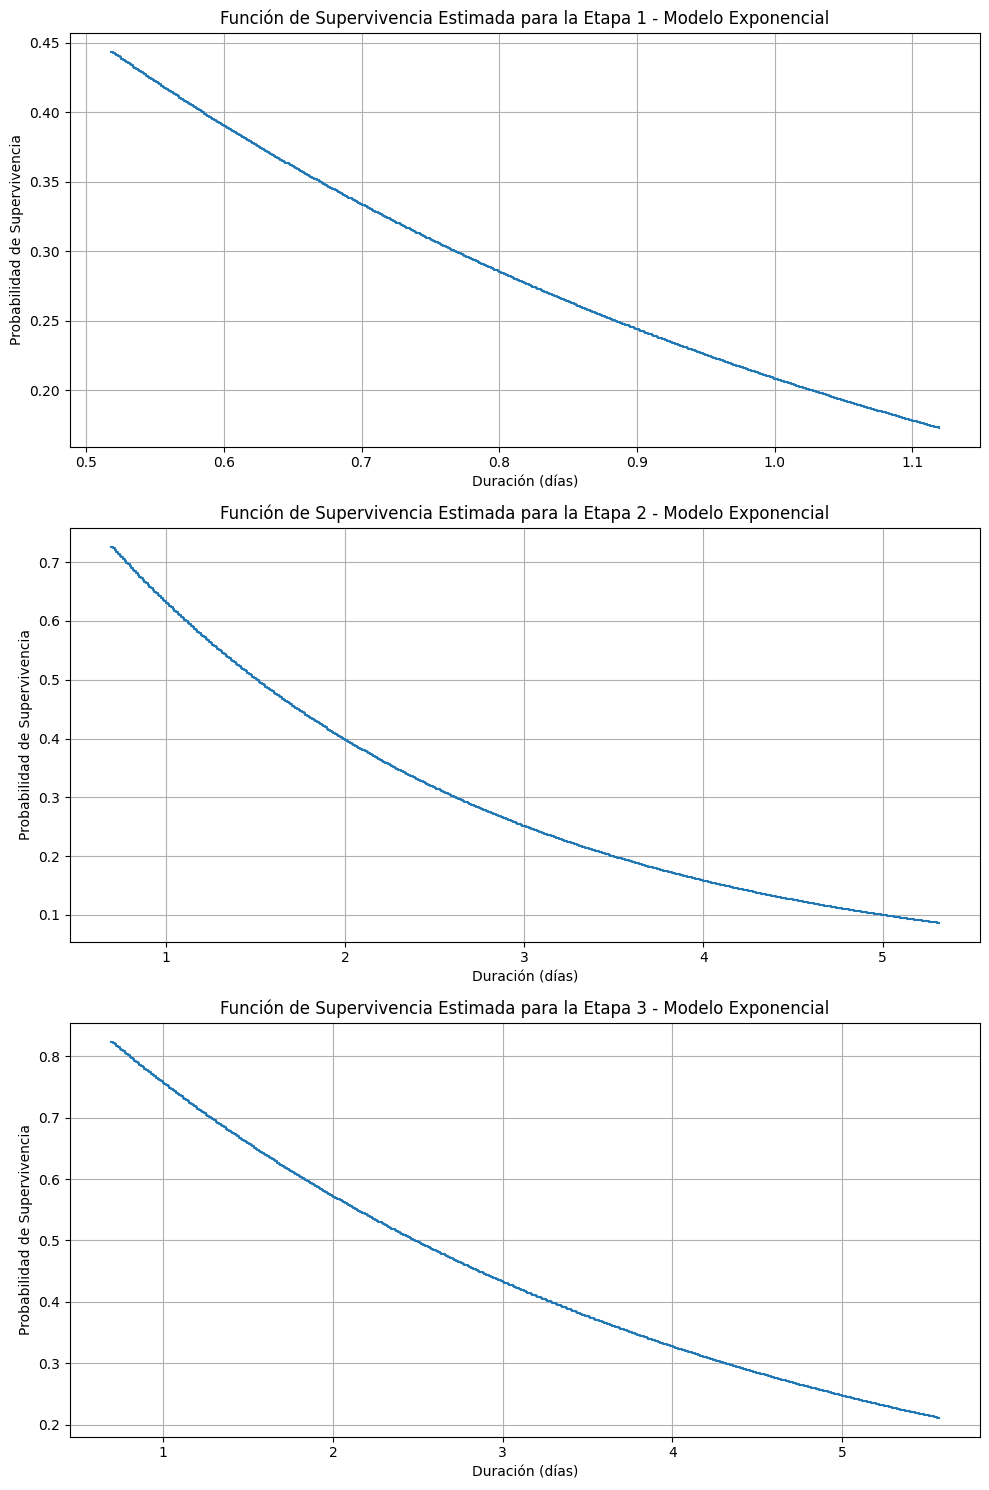

In [65]:

exponencial_clean = exponencial.dropna(subset=['DuracionEtapa1_BoxCox', 'Censurado1', 'DuracionEtapa2_log', 'Censurado2', 'DuracionEtapa3_log', 'Censurado3'])
exponencial_clean = exponencial_clean[(exponencial_clean['DuracionEtapa1_BoxCox'] > 0) & (exponencial_clean['DuracionEtapa2_log'] > 0) & (exponencial_clean['DuracionEtapa3_log'] > 0)]


# Inicialización de las figuras para las gráficas
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

for i, (duration_col, event_col, ax) in enumerate(zip(['DuracionEtapa1_BoxCox', 'DuracionEtapa2_log', 'DuracionEtapa3_log'],
                                                      ['Censurado1', 'Censurado2', 'Censurado3'],
                                                      axes), start=1):
    # Ajuste del modelo Exponencial para cada etapa
    exp_fitter = ExponentialFitter()
    exp_fitter.fit(exponencial_clean[duration_col], exponencial_clean[event_col], label=f'Etapa {i}')

    # La función de supervivencia estimada se obtiene directamente
    S = exp_fitter.survival_function_

    # Gráfico de la función de supervivencia para cada etapa
    ax.step(S.index, S.iloc[:, 0], where="post")
    ax.set_title(f'Función de Supervivencia Estimada para la Etapa {i} - Modelo Exponencial')
    ax.set_xlabel('Duración (días)')
    ax.set_ylabel('Probabilidad de Supervivencia')
    ax.grid(True)

plt.tight_layout()
plt.show()

Vamos a comparar el modelo exponencial con los datos reales para poder observar como se ajusta el modelo




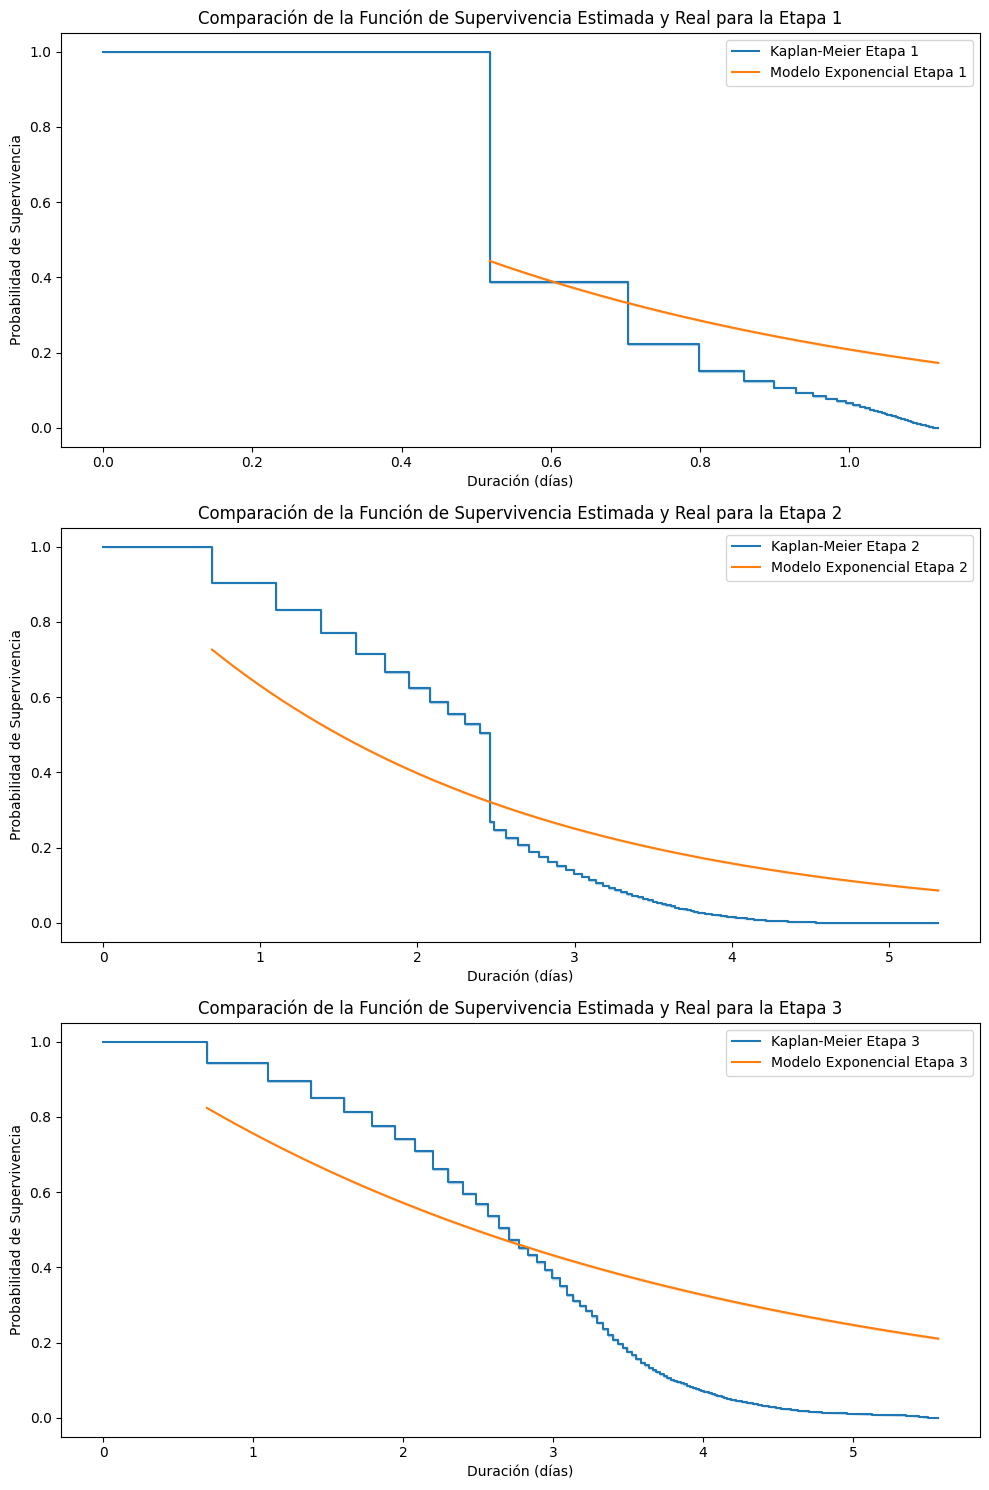

In [66]:
# Crear objetos KaplanMeierFitter y ExponentialFitter para cada etapa

kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()
kmf3 = KaplanMeierFitter()

exp_fitter1 = ExponentialFitter()
exp_fitter2 = ExponentialFitter()
exp_fitter3 = ExponentialFitter()

# Ajustar los modelos para cada etapa

kmf1.fit(exponencial_clean['DuracionEtapa1_BoxCox'], event_observed=exponencial_clean['Censurado1'])
kmf2.fit(exponencial_clean['DuracionEtapa2_log'], event_observed=exponencial_clean['Censurado2'])
kmf3.fit(exponencial_clean['DuracionEtapa3_log'], event_observed=exponencial_clean['Censurado3'])

exp_fitter1.fit(exponencial_clean['DuracionEtapa1_BoxCox'], exponencial_clean['Censurado1'])
exp_fitter2.fit(exponencial_clean['DuracionEtapa2_log'], exponencial_clean['Censurado2'])
exp_fitter3.fit(exponencial_clean['DuracionEtapa3_log'], exponencial_clean['Censurado3'])


# Crear subplots para las tres etapas
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Graficar las curvas de supervivencia de Kaplan-Meier y el modelo exponencial para cada etapa
for i, (kmf, exp_fitter, ax) in enumerate(zip([kmf1, kmf2, kmf3], [exp_fitter1, exp_fitter2, exp_fitter3], axes), start=1):
    kmf.plot_survival_function(ax=ax, label=f'Kaplan-Meier Etapa {i}')
    exp_fitter.plot_survival_function(ax=ax, label=f'Modelo Exponencial Etapa {i}')
    ax.set_title(f'Comparación de la Función de Supervivencia Estimada y Real para la Etapa {i}')
    ax.set_xlabel('Duración (días)')
    ax.set_ylabel('Probabilidad de Supervivencia')
    ax.legend()

plt.tight_layout()
plt.show()



Etapa 1: La curva de Kaplan-Meier se mantiene en 1 hasta caer abruptamente. Esto sugiere que hay un gran número de eventos que ocurren en un tiempo muy corto o simultáneamente, o que hay un punto de censura masiva en ese momento específico. El modelo exponencial, con su tasa de fallo constante, no captura esta característica de los datos, lo que resulta en una discrepancia considerable entre las dos curvas.

Etapa 2: Las curvas de Kaplan-Meier y el modelo exponencial divergen a medida que aumenta el tiempo. La curva de Kaplan-Meier muestra descensos más graduales en comparación con el modelo exponencial, lo que indica que la tasa de fallo varía con el tiempo, en lugar de ser constante.

Etapa 3: Similar a la Etapa 2, hay una divergencia entre las curvas de Kaplan-Meier y el modelo exponencial. La curva de Kaplan-Meier muestra descensos escalonados, mientras que el modelo exponencial decrece de forma continua y no refleja los cambios observados en la curva de Kaplan-Meier.

En general, el modelo de supervivencia exponencial es uno de los modelos paramétricos más sencillos. Asume una tasa de fallo constante, por lo que no considera covariables que puedan afectar la duración de las etapas de un servicio.

In [67]:

# Configuración para la validación cruzada
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

c_indices_etapa1 = []
c_indices_etapa2 = []
c_indices_etapa3 = []


for train_index, test_index in kf.split(exponencial_clean):
    # Dividir los datos en conjuntos de entrenamiento y prueba
    df_train = exponencial_clean.iloc[train_index]
    df_test = exponencial_clean.iloc[test_index]

    # Etapa 1
    durations_train1 = df_train['DuracionEtapa1_BoxCox'].values
    event_observed_train1 = df_train['Censurado1'].values
    durations_test1 = df_test['DuracionEtapa1_BoxCox'].values
    event_observed_test1 = df_test['Censurado1'].values

    # Ajustar el modelo exponencial para la Etapa 1
    exp_model1 = ExponentialFitter()
    exp_model1.fit(durations_train1, event_observed_train1)

    # Calcular la función de supervivencia estimada y convertirla a riesgo para la Etapa 1
    survival_function1 = exp_model1.survival_function_at_times(durations_test1)
    risks1 = -np.log(survival_function1)

    # Calcular el c-index para la Etapa 1
    c_index1 = concordance_index(durations_test1, risks1, event_observed_test1)
    c_indices_etapa1.append(c_index1)

    # Etapa 2
    durations_train2 = df_train['DuracionEtapa2_log'].values
    event_observed_train2 = df_train['Censurado2'].values
    durations_test2 = df_test['DuracionEtapa2_log'].values
    event_observed_test2 = df_test['Censurado2'].values

    # Ajustar el modelo exponencial para la Etapa 2
    exp_model2 = ExponentialFitter()
    exp_model2.fit(durations_train2, event_observed_train2)

    # Calcular la función de supervivencia estimada y convertirla a riesgo para la Etapa 2
    survival_function2 = exp_model2.survival_function_at_times(durations_test2)
    risks2 = -np.log(survival_function2)

    # Calcular el c-index para la Etapa 2
    c_index2 = concordance_index(durations_test2, risks2, event_observed_test2)
    c_indices_etapa2.append(c_index2)

    # Etapa 3
    durations_train3 = df_train['DuracionEtapa3_log'].values
    event_observed_train3 = df_train['Censurado3'].values
    durations_test3 = df_test['DuracionEtapa3_log'].values
    event_observed_test3 = df_test['Censurado3'].values

    # Ajustar el modelo exponencial para la Etapa 3
    exp_model3 = ExponentialFitter()
    exp_model3.fit(durations_train3, event_observed_train3)

    # Calcular la función de supervivencia estimada y convertirla a riesgo para la Etapa 3
    survival_function3 = exp_model3.survival_function_at_times(durations_test3)
    risks3 = -np.log(survival_function3)

    # Calcular el c-index para la Etapa 3
    c_index3 = concordance_index(durations_test3, risks3, event_observed_test3)
    c_indices_etapa3.append(c_index3)

# Calcular el c-index promedio para cada etapa
average_c_index_etapa1 = np.mean(c_indices_etapa1)
average_c_index_etapa2 = np.mean(c_indices_etapa2)
average_c_index_etapa3 = np.mean(c_indices_etapa3)
desviacion_c_index_etapa1 = np.std(c_indices_etapa1)
desviacion_c_index_etapa2 = np.std(c_indices_etapa2)
desviacion_c_index_etapa3 = np.std(c_indices_etapa3)

print(f"El c-index promedio para la Etapa 1 es: {average_c_index_etapa1}")
print(f"El c-index desviación Estapa 1: {desviacion_c_index_etapa1}")
print(f"El c-index promedio para la Etapa 2 es: {average_c_index_etapa2}")
print(f"El c-index desviación Estapa 2: {desviacion_c_index_etapa2}")
print(f"El c-index promedio para la Etapa 3 es: {average_c_index_etapa3}")
print(f"El c-index desviación Estapa 3: {desviacion_c_index_etapa3}")


El c-index promedio para la Etapa 1 es: 1.0
El c-index desviación Estapa 1: 0.0
El c-index promedio para la Etapa 2 es: 1.0
El c-index desviación Estapa 2: 0.0
El c-index promedio para la Etapa 3 es: 0.9800015698651144
El c-index desviación Estapa 3: 0.0003735597734589181


En el modelo de Supervivencia Exponencial, la función que nos calcula el riesgo de un evento, 'predict_survival_function', no es un método de 'ExponentialFitter', para calcular el riesgo para el c-index se puede calcular como:

H(t)=−log(S(t))

donde S(t) es la función de supervivencia.

Esta fórmula asume que la supervivencia es muy cercana a 1 para todos los tiempos, lo cual podría no ser el caso y por lo tanto los c-idex de cada etapa que son muy cercanos a 1, que sería un modelo perfecto, podrían estar erroneos.

 Logaritmo de la verosimilitud (log-likelihood)

In [68]:
from lifelines import ExponentialFitter

# Asumiendo que tienes un DataFrame `df` con las columnas 'duration' y 'event'
# donde 'duration' es la duración hasta el evento o censura,
# y 'event' es un indicador de si el evento de interés ocurrió (1) o si el dato está censurado (0).

# Ajuste del modelo exponencial para la Etapa 1
exp_model1 = ExponentialFitter()
exp_model1.fit(exponencial_clean['DuracionEtapa1_BoxCox'], event_observed=exponencial_clean['Censurado1'])
log_likelihood1 = exp_model1.log_likelihood_

# Ajuste del modelo exponencial para la Etapa 2
exp_model2 = ExponentialFitter()
exp_model2.fit(exponencial_clean['DuracionEtapa2_log'], event_observed=exponencial_clean['Censurado2'])
log_likelihood2 = exp_model2.log_likelihood_

# Ajuste del modelo exponencial para la Etapa 3
exp_model3 = ExponentialFitter()
exp_model3.fit(exponencial_clean['DuracionEtapa3_log'], event_observed=exponencial_clean['Censurado3'])
log_likelihood3 = exp_model3.log_likelihood_

print("Log-likelihood para la Etapa 1:", log_likelihood1)
print("Log-likelihood para la Etapa 2:", log_likelihood2)
print("Log-likelihood para la Etapa 3:", log_likelihood3)

Log-likelihood para la Etapa 1: -115392.31822565536
Log-likelihood para la Etapa 2: -371967.86347838014
Log-likelihood para la Etapa 3: -298778.1627325696


Los valores del log-likelihood indican la verosimilitud del modelo dado los datos observados. Un log-likelihood más alto (más cercano a cero) indica un mejor ajuste del modelo a los datos. En nuestro modelo, La etapa 1, es donde el modelo exponencial se ajusta más, pero los número son muy lejanos al cero, por lo que la predicción podría no ser precisa.

AIC (Criterio de Información de Akaike)

El criterio de información de Akaike (AIC) es una medida de la calidad relativa de un modelo estadístico para un conjunto dado de datos. Se calcula utilizando la fórmula:


AIC=2k - 2ln(L)

donde:

k: es el número de parámetros estimados en el modelo.

L: es el valor máximo de la función de verosimilitud para el modelo estimado (es decir, el log-likelihood ln(L)).

El AIC penaliza la complejidad del modelo para evitar el sobreajuste, favoreciendo modelos que explican bien los datos con el menor número de parámetros posible.

In [69]:
# Número de parámetros estimados en el modelo exponencial
k = 1

# Valores de log-likelihood para cada etapa
log_likelihood_etapa1 = log_likelihood1
log_likelihood_etapa2 = log_likelihood2
log_likelihood_etapa3 = log_likelihood3

# Cálculo del AIC para cada etapa
AIC_etapa1 = 2*k - 2*log_likelihood_etapa1
AIC_etapa2 = 2*k - 2*log_likelihood_etapa2
AIC_etapa3 = 2*k - 2*log_likelihood_etapa3


print("AIC para la Etapa 1:", AIC_etapa1)
print("AIC para la Etapa 2:", AIC_etapa2)
print("AIC para la Etapa 3:", AIC_etapa3)


AIC para la Etapa 1: 230786.6364513107
AIC para la Etapa 2: 743937.7269567603
AIC para la Etapa 3: 597558.3254651392


El AIC (Criterio de Información de Akaike) es una medida de la calidad relativa de los modelos estadísticos para un conjunto dado de datos. Proporciona un medio para la selección de modelos, donde un valor más bajo indica un mejor modelo en términos de equilibrio entre la bondad del ajuste y la complejidad del modelo. En nuestro caso, al igual que el Logaritmo de la verosimilitud (log-likelihood) la Etapa 1 es la que mejor se acopla al modelo.

In [70]:
exp_model1.print_summary()
exp_model2.print_summary()
exp_model3.print_summary()

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 209651 total observations, 0 right-censored observations>
   number of observations = 209651
number of events observed = 209651
           log-likelihood = -115392.32
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_   0.64       0.00             0.64             0.64

          cmp to      z      p   -log2(p)
lambda_     0.00 457.88 <0.005        inf
---
AIC = 230786.64

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 209651 total observations, 0 right-censored observations>
   number of observations = 209651
number of events observed = 209651
           log-likelihood = -371967.86
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_   2.17       0.00             2.16             2.18

          cmp to      z      p   -log2(p)
lambda_     0.00 457.88 <0.005        inf
---
AIC = 743937.73

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 209651 total observations, 78294 right-censored observations>
   number of observations = 209651
number of events observed = 131357
           log-likelihood = -298778.16
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_   3.58       0.01             3.56             3.60

          cmp to      z      p   -log2(p)
lambda_     0.00 362.43 <0.005        inf
---
AIC = 597558.33

## Modelo supervivencia paramétrico Weibull

In [71]:
weibull = df_final.copy()
weibull.head()

,Número de Semana,Costo_BoxCox,TieneCita,EntidadOrigen_index,lugardelevento_index,SubServicio_index,DuracionEtapa1_BoxCox,Censurado1,DuracionEtapa2_log,Censurado2,DuracionEtapa3_log,Censurado3
3,5,14.842834,True,0,0,0,0.518251,1,2.459360,1,3.332205,1
5,5,14.219905,False,1,0,0,0.518251,1,1.098612,1,3.367296,1
6,5,17.735597,True,2,0,0,0.518251,1,1.791759,1,3.178054,1
7,5,13.949871,False,3,0,0,0.518251,1,0.693147,1,3.295837,1
8,5,25.586132,False,4,1,0,0.799068,1,3.044522,1,2.079442,0


In [72]:


weibull_clean = weibull.dropna(subset=['DuracionEtapa1_BoxCox', 'Censurado1', 'DuracionEtapa2_log', 'Censurado2', 'DuracionEtapa3_log', 'Censurado3'])
weibull_clean = weibull_clean[weibull_clean['DuracionEtapa1_BoxCox'] > 0]
weibull_clean = weibull_clean[weibull_clean['DuracionEtapa2_log'] > 0]
weibull_clean = weibull_clean[weibull_clean['DuracionEtapa3_log'] > 0]

#Modelo Weibull

wf1 = WeibullFitter()
wf2 = WeibullFitter()
wf3 = WeibullFitter()


wf1.fit(durations=weibull_clean['DuracionEtapa1_BoxCox'], event_observed=weibull_clean['Censurado1'])
wf2.fit(durations=weibull_clean['DuracionEtapa2_log'], event_observed=weibull_clean['Censurado2'])
wf3.fit(durations=weibull_clean['DuracionEtapa3_log'], event_observed=weibull_clean['Censurado3'])


print("Etapa 1:", wf1.summary)
print("Etapa 2:", wf2.summary)
print("Etapa 3:", wf3.summary)


Etapa 1:              coef  se(coef)  coef lower 95%  coef upper 95%  cmp to  \
lambda_  0.704510  0.000440        0.703647        0.705372     1.0   
rho_     3.724819  0.005823        3.713407        3.736232     1.0   

                  z    p  -log2(p)  
lambda_ -671.547849  0.0       inf  
rho_     467.962539  0.0       inf  
Etapa 2:              coef  se(coef)  coef lower 95%  coef upper 95%  cmp to  \
lambda_  2.432287  0.001917        2.428529        2.436045     1.0   
rho_     2.909137  0.005054        2.899231        2.919043     1.0   

                  z    p  -log2(p)  
lambda_  747.051105  0.0       inf  
rho_     377.741534  0.0       inf  
Etapa 3:              coef  se(coef)  coef lower 95%  coef upper 95%  cmp to  \
lambda_  2.956967  0.002851        2.951379        2.962555     1.0   
rho_     2.861554  0.005808        2.850172        2.872937     1.0   

                  z    p  -log2(p)  
lambda_  686.376268  0.0       inf  
rho_     320.542710  0.0       inf 

Resultados:

Etapa 1:

λ (lambda_) = 0.704510: El tiempo hasta el evento de interés tiene una mediana estimada más baja en comparación con las etapas 2 y 3.

ρ (rho_) = 3.724819: Un valor de ρ mayor que 1 implica que el riesgo de ocurrencia del evento aumenta con el tiempo. Un ρ de aproximadamente 3.72 indica un aumento acelerado del riesgo a medida que pasa el tiempo en esta etapa.


Etapa 2:

λ = 2.432287: En comparación con la Etapa 1, este valor más alto sugiere que el tiempo hasta el evento es generalmente más largo en la Etapa 2. Los eventos de interés tienden a ocurrir más tarde que en la Etapa 1.

ρ = 2.909137: Al igual que en la Etapa 1, ρ es mayor que 1, lo que indica un riesgo creciente a lo largo del tiempo. Sin embargo, el incremento es menos pronunciado que en la Etapa 1, lo que refleja una aceleración del riesgo más moderada.

Etapa 3:

λ = 2.956967: Este es el valor más alto de λ entre las tres etapas, indicando que el tiempo hasta el evento es el más largo en esta etapa. Los eventos tienden a ocurrir más tarde en comparación con las etapas anteriores.

ρ = 2.861554: Al igual que en las otras etapas, el riesgo de ocurrencia del evento aumenta con el tiempo, pero el valor de ρ sugiere que este aumento es similar al observado en la Etapa 2, con un crecimiento del riesgo relativamente moderado a lo largo del tiempo.

Gráfico Log-Log nos va ayudar a verificar la adecuación del Modelo Weibull


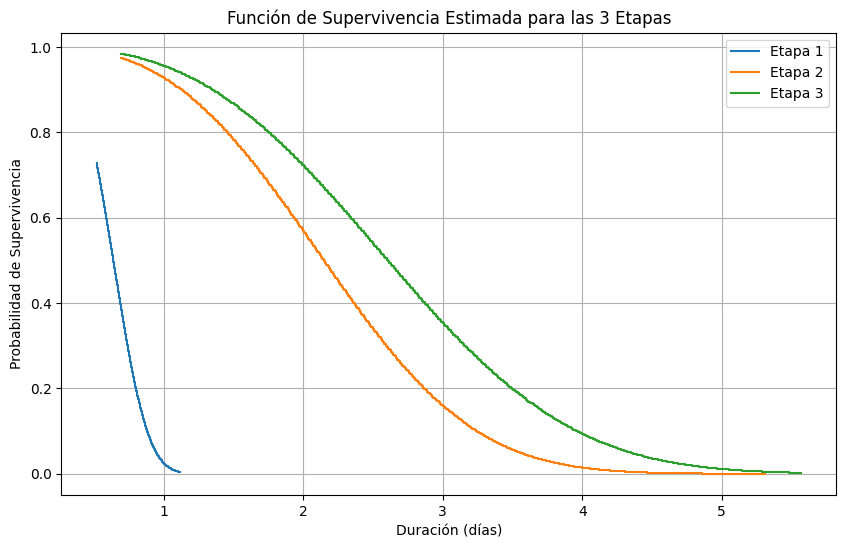

In [73]:
# Supervivencia estimadas
S1 = wf1.survival_function_
S2 = wf2.survival_function_
S3 = wf3.survival_function_

#Gráfica

plt.figure(figsize=(10, 6))


plt.step(S1.index, S1['Weibull_estimate'], where="post", label='Etapa 1')
plt.step(S2.index, S2['Weibull_estimate'], where="post", label='Etapa 2')
plt.step(S3.index, S3['Weibull_estimate'], where="post", label='Etapa 3')

plt.title('Función de Supervivencia Estimada para las 3 Etapas')
plt.xlabel('Duración (días)')
plt.ylabel('Probabilidad de Supervivencia')
plt.legend()
plt.grid(True)

plt.show()

Análisis:

Etapa 1: La curva azul muestra una rápida disminución en la probabilidad de supervivencia al principio, lo que nos indica que los eventos de interés ocurren con mayor frecuencia al comienzo de esta etapa.

Etapa 2: La curva naranja decrece más lentamente en comparación con la etapa 1, lo que nos podría indicar que los eventos son menos frecuentes y tiende un efecto en prolongar la supervivencia del servicio.

Etapa 3: Nos indica una mayor duración de supervivencia.

Prueba de Bondad de Ajuste

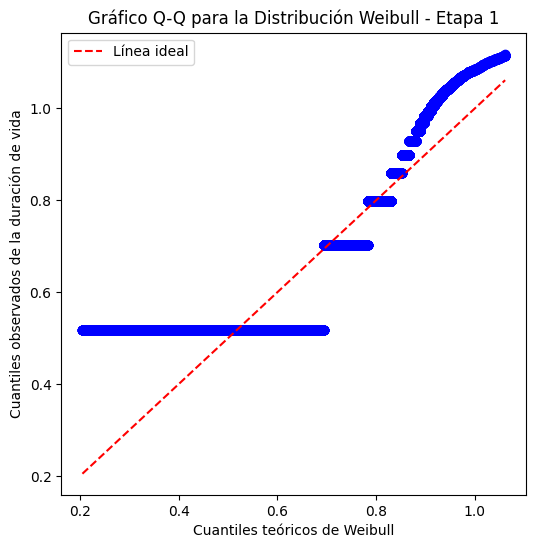

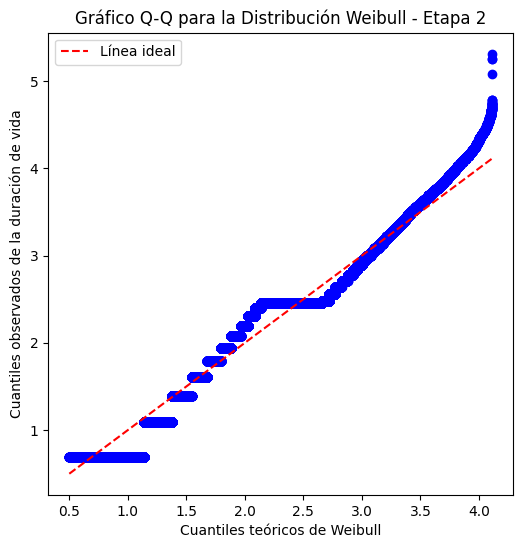

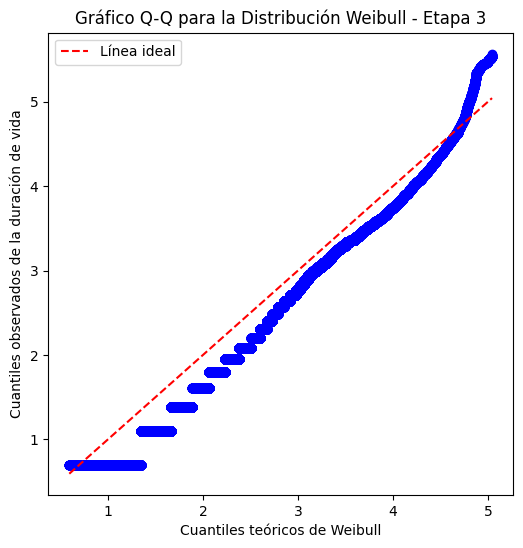

In [74]:
# Ajuste del modelo Weibull para cada etapa y creación de los gráficos Q-Q
for i, (duration_col, event_col) in enumerate([('DuracionEtapa1_BoxCox', 'Censurado1'),
                                                ('DuracionEtapa2_log', 'Censurado2'),
                                                ('DuracionEtapa3_log', 'Censurado3')], start=1):
    # Ajustar el modelo Weibull
    wf = WeibullFitter()
    wf.fit(weibull_clean[duration_col], weibull_clean[event_col], label=f'Etapa {i}')

    # Filtrar para incluir solo los eventos no censurados
    observed_lifetimes = weibull_clean.loc[weibull_clean[event_col] == 1, duration_col]

    # Calcular cuantiles observados
    observed_quantiles = np.percentile(observed_lifetimes, np.linspace(0, 100, len(observed_lifetimes)))

    # Calcular cuantiles teóricos usando los parámetros estimados del modelo
    theoretical_quantiles = stats.weibull_min.ppf(np.linspace(0.01, 0.99, len(observed_lifetimes)), c=wf.rho_, scale=wf.lambda_)

    # Gráfico Q-Q
    plt.figure(figsize=(6, 6))
    plt.scatter(theoretical_quantiles, observed_quantiles, color='blue')
    plt.plot(theoretical_quantiles, theoretical_quantiles, color='red', linestyle='--', label="Línea ideal")
    plt.title(f'Gráfico Q-Q para la Distribución Weibull - Etapa {i}')
    plt.xlabel('Cuantiles teóricos de Weibull')
    plt.ylabel('Cuantiles observados de la duración de vida')
    plt.legend()
    plt.show()

Línea Roja (Línea Ideal): Representa dónde estarían los puntos si los datos siguieran perfectamente la distribución Weibull.

Puntos Azules (Cuantiles Observados): Representan los cuantiles de los datos observados. Cuanto más cerca estén estos puntos de la línea roja, más cerca estará la distribución de los datos de una distribución Weibull.

Etapa 1: Los puntos siguen bastante de cerca la línea roja punteada en el rango inferior de cuantiles teóricos, lo que indica que el modelo de Weibull podría ser un buen ajuste para los tiempos de supervivencia más cortos. Sin embargo, para los valores más altos, los puntos se desvían significativamente de la línea, lo que indica que el modelo no captura bien la cola de la distribución.

Etapa 2: Al inicio y en medio, los datos siguen aproximadamente la línea ideal por lo que se ajustan razonablemente bien a la distribución Weibull, pero al final se separan las lineas por los tiempos de supervivencia más largos no se ajustan bien a la distribución Weibull y que hay más eventos de lo esperado en tiempos largos en comparación con la distribución Weibull.

Etapa 3: La desviación de los puntos azules de la línea roja en los extremos inferior y superior sugiere que la distribución Weibull puede no ser el mejor modelo para describir los datos de la duración de la etapa 3, especialmente para tiempos muy cortos y muy largos.


In [75]:


# Validación cruzada
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)


c_indices_etapa1 = []
c_indices_etapa2 = []
c_indices_etapa3 = []

for train_index, test_index in kf.split(weibull_clean):
    # Dividir los datos en conjuntos de entrenamiento y prueba
    df_train = weibull_clean.iloc[train_index]
    df_test = weibull_clean.iloc[test_index]

    # Etapa 1
    durations_train1 = df_train['DuracionEtapa1_BoxCox'].values
    events_train1 = df_train['Censurado1'].values
    durations_test1 = df_test['DuracionEtapa1_BoxCox'].values
    events_test1 = df_test['Censurado1'].values

    weibull_model1 = WeibullFitter()
    weibull_model1.fit(durations_train1, events_train1)
    # Predecir la función de supervivencia
    survival_functionweibull1 = weibull_model1.survival_function_at_times(durations_test1)
    # Calcular el riesgo acumulado
    risksweibull1 = -np.log(survival_functionweibull1.values)
    # Calcular el c-index
    c_index1 = concordance_index(durations_test1, risksweibull1, event_observed=events_test1)
    c_indices_etapa1.append(c_index1)


        # Etapa 2
    durations_train2 = df_train['DuracionEtapa2_log'].values
    events_train2 = df_train['Censurado2'].values
    durations_test2 = df_test['DuracionEtapa2_log'].values
    events_test2 = df_test['Censurado2'].values

    weibull_model2 = WeibullFitter()
    weibull_model2.fit(durations_train2, events_train2)
    # Predecir la función de supervivencia
    survival_functionweibull2 = weibull_model2.survival_function_at_times(durations_test2)
    # Calcular el riesgo acumulado
    risksweibull2 = -np.log(survival_functionweibull2.values)
    # Calcular el c-index
    c_index2 = concordance_index(durations_test2, risksweibull2, event_observed=events_test2)
    c_indices_etapa2.append(c_index2)


            # Etapa 3
    durations_train3 = df_train['DuracionEtapa3_log'].values
    events_train3 = df_train['Censurado3'].values
    durations_test3 = df_test['DuracionEtapa3_log'].values
    events_test3 = df_test['Censurado3'].values

    weibull_model3 = WeibullFitter()
    weibull_model3.fit(durations_train3, events_train3)
    # Predecir la función de supervivencia
    survival_functionweibull3 = weibull_model3.survival_function_at_times(durations_test3)
    # Calcular el riesgo acumulado
    risksweibull3 = -np.log(survival_functionweibull3.values)
    # Calcular el c-index
    c_index3 = concordance_index(durations_test3, risksweibull3, event_observed=events_test3)
    c_indices_etapa3.append(c_index3)

# C-index
mean_c_index_etapa1 = np.mean(c_indices_etapa1)
print(f"Promedio de C-index para la Etapa 1: {mean_c_index_etapa1}")

mean_c_index_etapa2 = np.mean(c_indices_etapa2)
print(f"Promedio de C-index para la Etapa 2: {mean_c_index_etapa2}")

mean_c_index_etapa3 = np.mean(c_indices_etapa3)
print(f"Promedio de C-index para la Etapa 3: {mean_c_index_etapa3}")

Promedio de C-index para la Etapa 1: 1.0
Promedio de C-index para la Etapa 2: 1.0
Promedio de C-index para la Etapa 3: 0.9800015698651144


In [76]:
weibull_model1.print_summary()
weibull_model2.print_summary()
weibull_model3.print_summary()

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 167721 total observations, 0 right-censored observations>
   number of observations = 167721
number of events observed = 167721
           log-likelihood = 51691.05
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_   0.70       0.00             0.70             0.71
rho_      3.72       0.01             3.71             3.74

          cmp to       z      p   -log2(p)
lambda_     1.00 -599.96 <0.005        inf
rho_        1.00  418.46 <0.005        inf
---
AIC = -103378.10

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 167721 total observations, 0 right-censored observations>
   number of observations = 167721
number of events observed = 167721
           log-likelihood = -203579.25
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_   2.43       0.00             2.43             2.44
rho_      2.91       0.01             2.89             2.92

          cmp to      z      p   -log2(p)
lambda_     1.00 667.27 <0.005        inf
rho_        1.00 337.67 <0.005        inf
---
AIC = 407162.49

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 167721 total observations, 62824 right-censored observations>
   number of observations = 167721
number of events observed = 104897
           log-likelihood = -176903.19
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_   2.96       0.00             2.95             2.96
rho_      2.86       0.01             2.85             2.88

          cmp to      z      p   -log2(p)
lambda_     1.00 613.63 <0.005        inf
rho_        1.00 286.49 <0.005        inf
---
AIC = 353810.39


## Modelo supervivencia paramétrico log-normal



El modelo de supervivencia log-normal es un modelo paramétrico que asume que el logaritmo de los tiempos de supervivencia sigue una distribución normal. Es útil cuando los datos de supervivencia tienen una forma que es asimétricamente sesgada y pueden tener una larga cola hacia la derecha, que podría ser el caso de nuestros datos.

In [77]:
lognormal = df_final.copy()

lognormal.head()

,Número de Semana,Costo_BoxCox,TieneCita,EntidadOrigen_index,lugardelevento_index,SubServicio_index,DuracionEtapa1_BoxCox,Censurado1,DuracionEtapa2_log,Censurado2,DuracionEtapa3_log,Censurado3
3,5,14.842834,True,0,0,0,0.518251,1,2.459360,1,3.332205,1
5,5,14.219905,False,1,0,0,0.518251,1,1.098612,1,3.367296,1
6,5,17.735597,True,2,0,0,0.518251,1,1.791759,1,3.178054,1
7,5,13.949871,False,3,0,0,0.518251,1,0.693147,1,3.295837,1
8,5,25.586132,False,4,1,0,0.799068,1,3.044522,1,2.079442,0


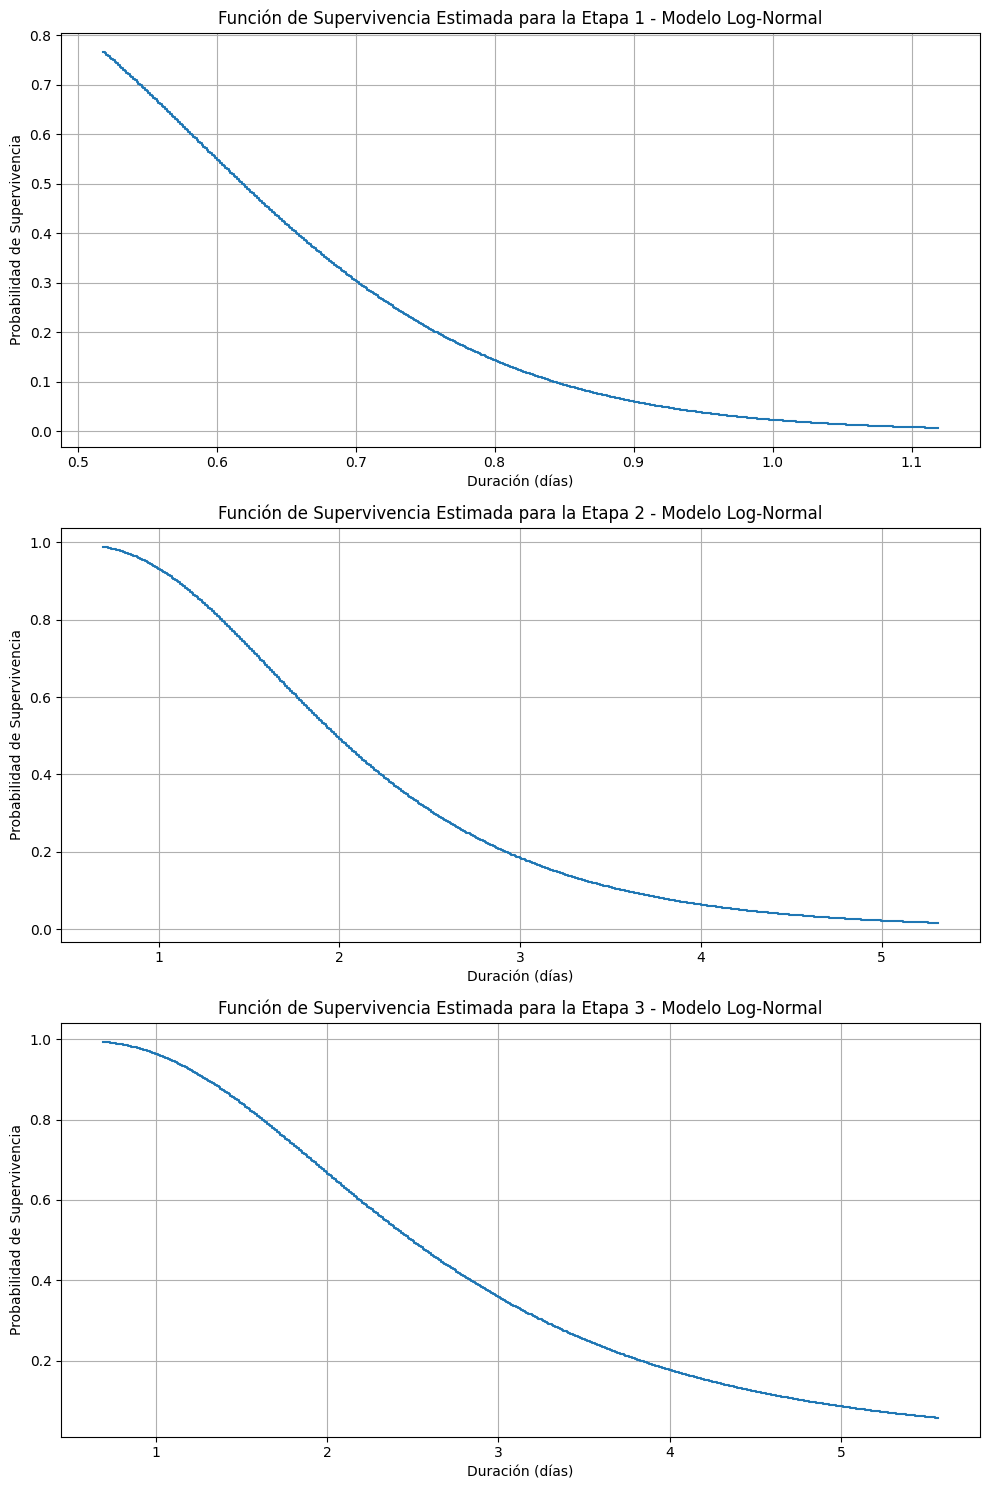

In [78]:


lognormal_clean = lognormal.dropna(subset=['DuracionEtapa1_BoxCox', 'Censurado1', 'DuracionEtapa2_log', 'Censurado2', 'DuracionEtapa3_log', 'Censurado3'])
lognormal_clean = lognormal_clean[lognormal_clean['DuracionEtapa1_BoxCox'] > 0]
lognormal_clean = lognormal_clean[lognormal_clean['DuracionEtapa2_log'] > 0]
lognormal_clean = lognormal_clean[lognormal_clean['DuracionEtapa3_log'] > 0]



fig, axes = plt.subplots(3, 1, figsize=(10, 15))

for i, (duration_col, event_col, ax) in enumerate(zip(['DuracionEtapa1_BoxCox', 'DuracionEtapa2_log', 'DuracionEtapa3_log'],
                                                      ['Censurado1', 'Censurado2', 'Censurado3'],
                                                      axes), start=1):
    # Ajuste del modelo log-normal para cada etapa
    ln_fitter = LogNormalFitter()
    ln_fitter.fit(lognormal_clean[duration_col], lognormal_clean[event_col], label=f'Etapa {i}')

    # Extracción de la función de supervivencia estimada
    S = ln_fitter.survival_function_

    # Gráfico de la función de supervivencia para cada etapa
    ax.step(S.index, S.iloc[:, 0], where="post")  # Solo hay una columna en el DataFrame de supervivencia
    ax.set_title(f'Función de Supervivencia Estimada para la Etapa {i} - Modelo Log-Normal')
    ax.set_xlabel('Duración (días)')
    ax.set_ylabel('Probabilidad de Supervivencia')
    ax.grid(True)

plt.tight_layout()
plt.show()

Vamos a comparar el modelo og-normal con los datos reales para poder observar como se ajusta el modelo

---



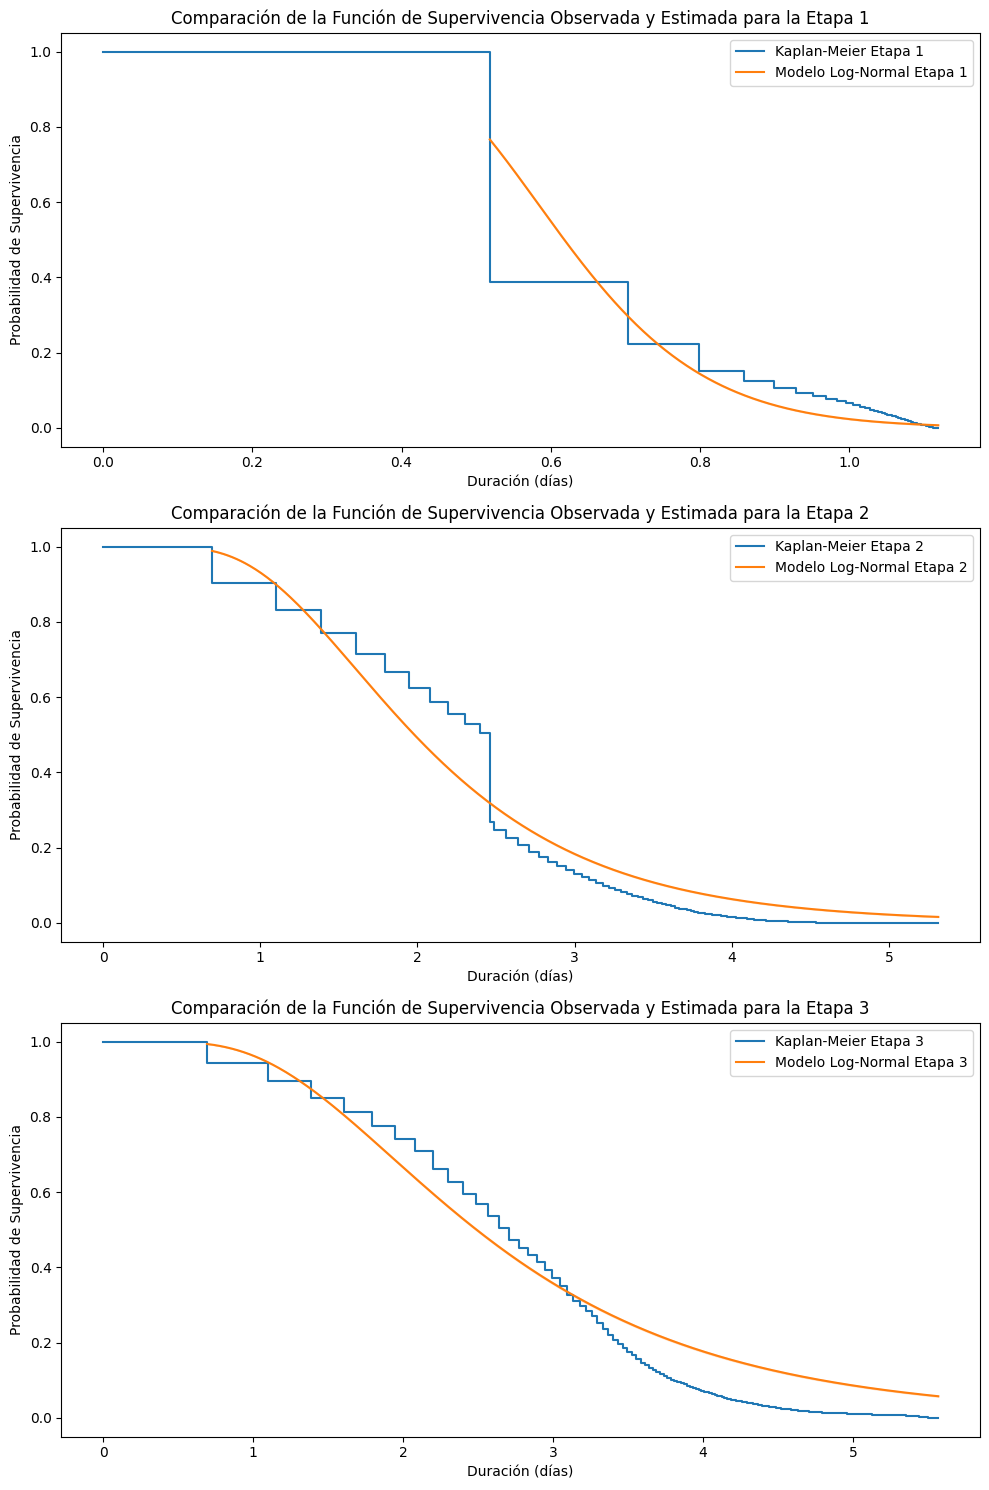

In [79]:
# Objetos de Kaplan-Meier y LogNormalFitter para cada etapa

kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()
kmf3 = KaplanMeierFitter()

ln_fitter1 = LogNormalFitter()
ln_fitter2 = LogNormalFitter()
ln_fitter3 = LogNormalFitter()

# Ajuste de los objetos de Kaplan-Meier y LogNormalFitter

kmf1.fit(lognormal_clean['DuracionEtapa1_BoxCox'], event_observed=lognormal_clean['Censurado1'])
kmf2.fit(lognormal_clean['DuracionEtapa2_log'], event_observed=lognormal_clean['Censurado2'])
kmf3.fit(lognormal_clean['DuracionEtapa3_log'], event_observed=lognormal_clean['Censurado3'])

ln_fitter1.fit(lognormal_clean['DuracionEtapa1_BoxCox'], event_observed=lognormal_clean['Censurado1'])
ln_fitter2.fit(lognormal_clean['DuracionEtapa2_log'], event_observed=lognormal_clean['Censurado2'])
ln_fitter3.fit(lognormal_clean['DuracionEtapa3_log'], event_observed=lognormal_clean['Censurado3'])

# Gráfica
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

for i, (kmf, ln_fitter, ax) in enumerate(zip([kmf1, kmf2, kmf3],
                                              [ln_fitter1, ln_fitter2, ln_fitter3],
                                              axes), start=1):
    # Graficar la función de supervivencia de Kaplan-Meier (observada)
    kmf.plot_survival_function(ax=ax, ci_show=False, label=f'Kaplan-Meier Etapa {i}')

    # Graficar la función de supervivencia del modelo log-normal (estimada)
    ln_fitter.plot_survival_function(ax=ax, label=f'Modelo Log-Normal Etapa {i}')

    # Títulos y etiquetas
    ax.set_title(f'Comparación de la Función de Supervivencia Observada y Estimada para la Etapa {i}')
    ax.set_xlabel('Duración (días)')
    ax.set_ylabel('Probabilidad de Supervivencia')
    ax.legend()

plt.tight_layout()
plt.show()

In [80]:
# Validación cruzada
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)


c_lognormal_etapa1 = []
c_lognormal_etapa2 = []
c_lognormal_etapa3 = []

for train_index, test_index in kf.split(lognormal_clean):
    # Dividir los datos en conjuntos de entrenamiento y prueba
    df_train = lognormal_clean.iloc[train_index]
    df_test = lognormal_clean.iloc[test_index]

    # Etapa 1
    durations_train1 = df_train['DuracionEtapa1_BoxCox'].values
    events_train1 = df_train['Censurado1'].values
    durations_test1 = df_test['DuracionEtapa1_BoxCox'].values
    events_test1 = df_test['Censurado1'].values

    lognormal_model1 = LogNormalFitter()
    lognormal_model1.fit(durations_train1, events_train1)
    # Predecir la función de supervivencia
    survival_functionlognormal1 = lognormal_model1.survival_function_at_times(durations_test1)
    # Calcular el riesgo acumulado
    riskslognormal1 = -np.log(survival_functionlognormal1.values)
    # Calcular el c-index
    c_index1 = concordance_index(durations_test1, riskslognormal1, event_observed=events_test1)
    c_lognormal_etapa1.append(c_index1)


        # Etapa 2
    durations_train2 = df_train['DuracionEtapa2_log'].values
    events_train2 = df_train['Censurado1'].values
    durations_test2 = df_test['DuracionEtapa2_log'].values
    events_test2 = df_test['Censurado1'].values

    lognormal_model2 = LogNormalFitter()
    lognormal_model2.fit(durations_train2, events_train2)
    # Predecir la función de supervivencia
    survival_functionlognormal2 = lognormal_model2.survival_function_at_times(durations_test2)
    # Calcular el riesgo acumulado
    riskslognormal2 = -np.log(survival_functionlognormal2.values)
    # Calcular el c-index
    c_index2 = concordance_index(durations_test2, riskslognormal2, event_observed=events_test2)
    c_lognormal_etapa2.append(c_index2)


            # Etapa 3
    durations_train3 = df_train['DuracionEtapa3_log'].values
    events_train3 = df_train['Censurado3'].values
    durations_test3 = df_test['DuracionEtapa3_log'].values
    events_test3 = df_test['Censurado3'].values

    lognormal_model3 = LogNormalFitter()
    lognormal_model3.fit(durations_train3, events_train3)
    # Predecir la función de supervivencia
    survival_functionlognormal3 = lognormal_model3.survival_function_at_times(durations_test3)
    # Calcular el riesgo acumulado
    riskslognormal3 = -np.log(survival_functionlognormal3.values)
    # Calcular el c-index
    c_index3 = concordance_index(durations_test3, riskslognormal3, event_observed=events_test3)
    c_lognormal_etapa3.append(c_index3)

# C-index
mean_c_lognormal_etapa1 = np.mean(c_lognormal_etapa1)
print(f"Promedio de C-index para la Etapa 1: {mean_c_lognormal_etapa1}")

mean_c_lognormal_etapa2 = np.mean(c_lognormal_etapa2)
print(f"Promedio de C-index para la Etapa 2: {mean_c_lognormal_etapa2}")

mean_c_lognormal_etapa3 = np.mean(c_lognormal_etapa3)
print(f"Promedio de C-index para la Etapa 3: {mean_c_lognormal_etapa3}")

Promedio de C-index para la Etapa 1: 1.0
Promedio de C-index para la Etapa 2: 1.0
Promedio de C-index para la Etapa 3: 0.9800015698651144


In [81]:
lognormal_model1.print_summary()
lognormal_model2.print_summary()
lognormal_model3.print_summary()

<lifelines.LogNormalFitter:"LogNormal_estimate", fitted with 167721 total observations, 0 right-censored observations>
   number of observations = 167721
number of events observed = 167721
           log-likelihood = 80496.67
               hypothesis = mu_ != 0, sigma_ != 1

---
         coef   se(coef)   coef lower 95%   coef upper 95%
mu_     -0.48       0.00            -0.48            -0.48
sigma_   0.24       0.00             0.24             0.24

         cmp to        z      p   -log2(p)
mu_        0.00  -813.15 <0.005        inf
sigma_     1.00 -1812.04 <0.005        inf
---
AIC = -160989.34

<lifelines.LogNormalFitter:"LogNormal_estimate", fitted with 167721 total observations, 0 right-censored observations>
   number of observations = 167721
number of events observed = 167721
           log-likelihood = -222336.42
               hypothesis = mu_ != 0, sigma_ != 1

---
         coef   se(coef)   coef lower 95%   coef upper 95%
mu_      0.68       0.00             0.68             0.69
sigma_   0.46       0.00             0.46             0.46

         cmp to       z      p   -log2(p)
mu_        0.00  607.90 <0.005        inf
sigma_     1.00 -679.59 <0.005        inf
---
AIC = 444676.84

<lifelines.LogNormalFitter:"LogNormal_estimate", fitted with 167721 total observations, 62824 right-censored observations>
   number of observations = 167721
number of events observed = 104897
           log-likelihood = -190075.52
               hypothesis = mu_ != 0, sigma_ != 1

---
         coef   se(coef)   coef lower 95%   coef upper 95%
mu_      0.91       0.00             0.91             0.92
sigma_   0.51       0.00             0.51             0.51

         cmp to       z      p   -log2(p)
mu_        0.00  641.40 <0.005        inf
sigma_     1.00 -438.20 <0.005        inf
---
AIC = 380155.04

## Modelo supervivencia paramétrico log-logística


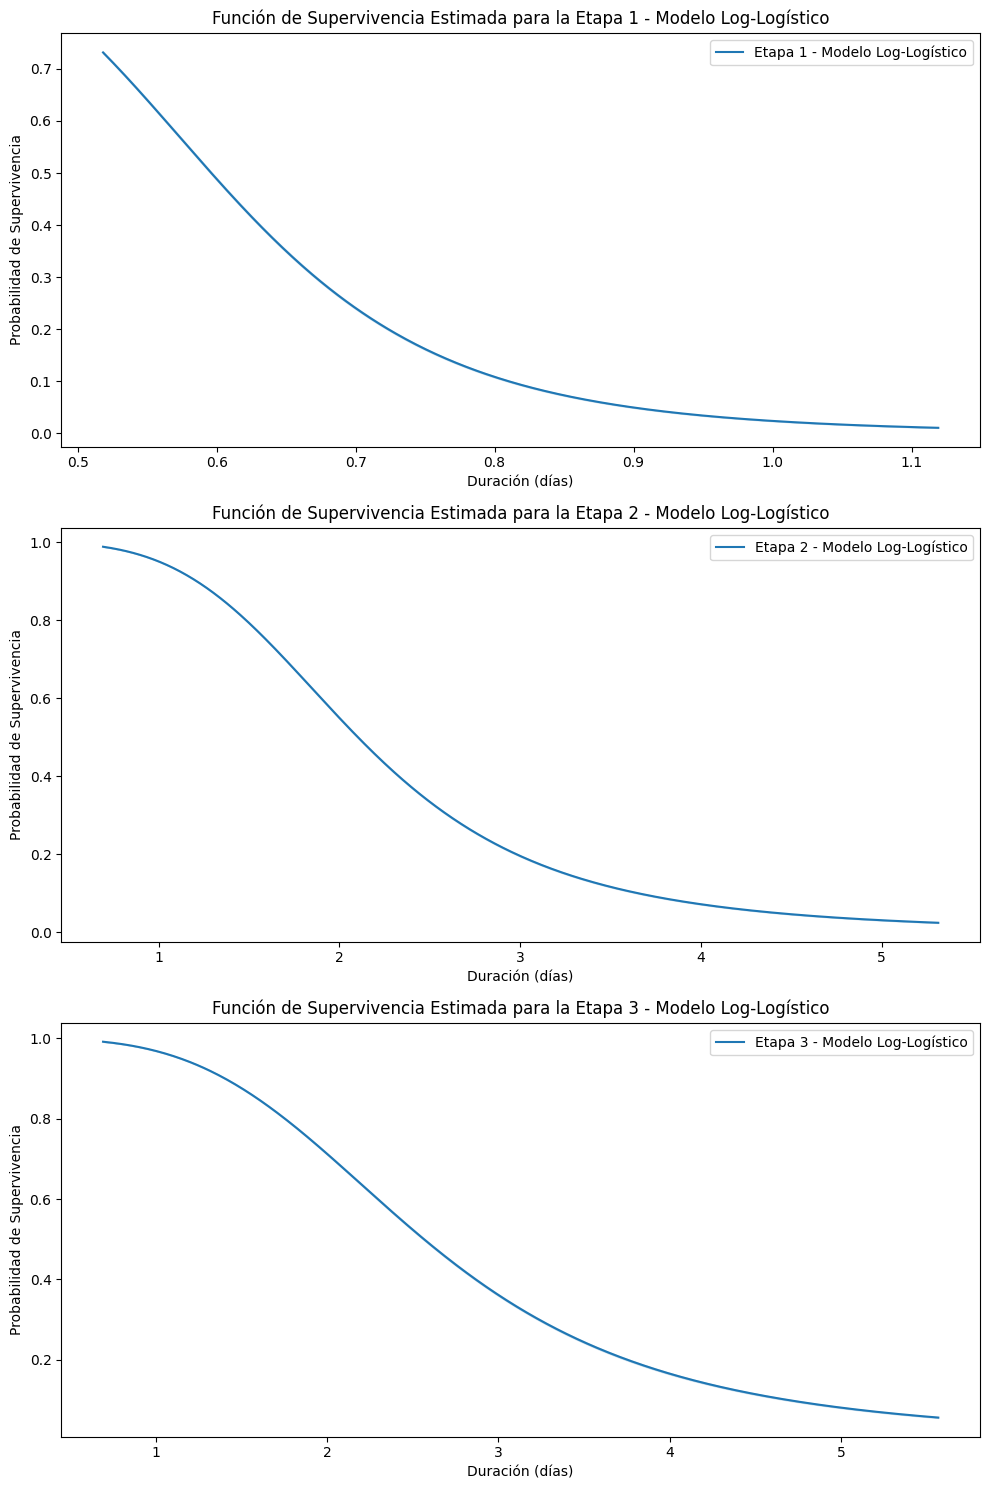

In [82]:
loglogistica = df_final.copy()

# Calculando la duración en días


loglogistica_clean = loglogistica.dropna(subset=['DuracionEtapa1_BoxCox', 'Censurado1', 'DuracionEtapa2_log', 'Censurado2', 'DuracionEtapa3_log', 'Censurado3'])
loglogistica_clean = loglogistica_clean[loglogistica_clean['DuracionEtapa1_BoxCox'] > 0]
loglogistica_clean = loglogistica_clean[loglogistica_clean['DuracionEtapa2_log'] > 0]
loglogistica_clean = loglogistica_clean[loglogistica_clean['DuracionEtapa3_log'] > 0]


# Inicialización del modelo Log-Logístico para cada etapa
llf1 = LogLogisticFitter()
llf2 = LogLogisticFitter()
llf3 = LogLogisticFitter()

# Ajuste del modelo a los datos
llf1.fit(loglogistica_clean['DuracionEtapa1_BoxCox'], event_observed=loglogistica_clean['Censurado1'])
llf2.fit(loglogistica_clean['DuracionEtapa2_log'], event_observed=loglogistica_clean['Censurado2'])
llf3.fit(loglogistica_clean['DuracionEtapa3_log'], event_observed=loglogistica_clean['Censurado3'])

# Inicialización de la figura para las gráficas
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

for i, (ll_fitter, ax) in enumerate(zip([llf1, llf2, llf3], axes), start=1):
    # Gráfico de la función de supervivencia para cada etapa
    ll_fitter.plot_survival_function(ax=ax, label=f'Etapa {i} - Modelo Log-Logístico')

    # Títulos y etiquetas
    ax.set_title(f'Función de Supervivencia Estimada para la Etapa {i} - Modelo Log-Logístico')
    ax.set_xlabel('Duración (días)')
    ax.set_ylabel('Probabilidad de Supervivencia')
    ax.legend()

plt.tight_layout()
plt.show()

Vamos a comparar el modelo Log logaritmica con los datos reales para poder observar como se ajusta el modelo

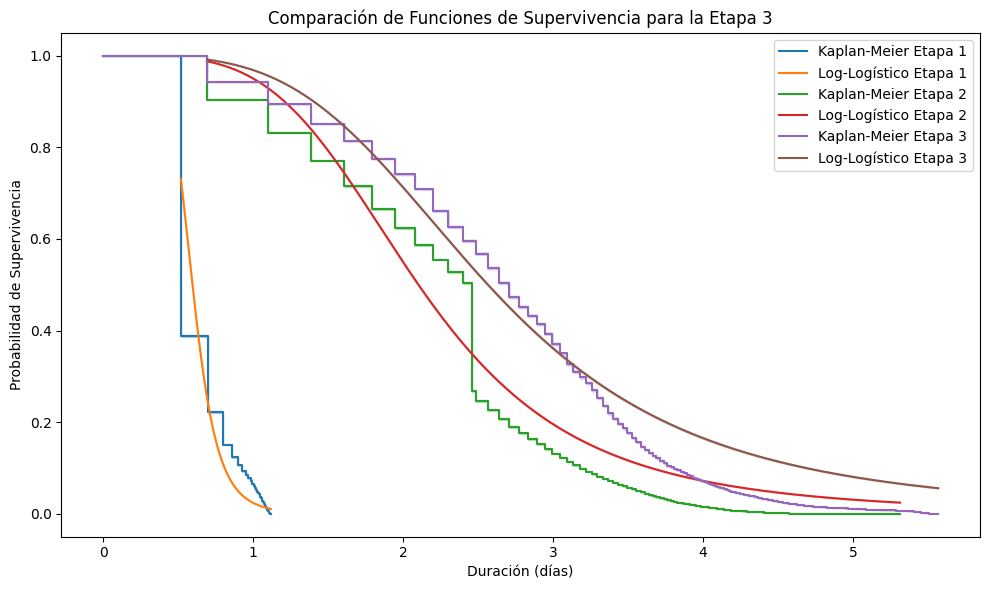

In [83]:
# Ajustamos el modelo Kaplan-Meier
kmf = KaplanMeierFitter()

# Ajustamos el modelo Log-Logístico
llf = LogLogisticFitter()

# Inicializamos la figura
plt.figure(figsize=(10, 6))

# Ajustamos y graficamos para cada etapa
for i, duration_col, event_col in zip(range(1, 4),
                                      ['DuracionEtapa1_BoxCox', 'DuracionEtapa2_log', 'DuracionEtapa3_log'],
                                      ['Censurado1', 'Censurado2', 'Censurado3']):
    # Ajustar Kaplan-Meier
    kmf.fit(loglogistica_clean[duration_col], event_observed=loglogistica_clean[event_col])
    kmf.plot_survival_function(label=f'Kaplan-Meier Etapa {i}')

    # Ajustar Log-Logístico
    llf.fit(loglogistica_clean[duration_col], event_observed=loglogistica_clean[event_col])
    llf.plot_survival_function(label=f'Log-Logístico Etapa {i}')

    plt.title(f'Comparación de Funciones de Supervivencia para la Etapa {i}')
    plt.xlabel('Duración (días)')
    plt.ylabel('Probabilidad de Supervivencia')
    plt.legend()

plt.tight_layout()
plt.show()

In [84]:
# Validación cruzada
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)


c_loglog_etapa1 = []
c_loglog_etapa2 = []
c_loglog_etapa3 = []

for train_index, test_index in kf.split(loglogistica_clean):
    # Dividir los datos en conjuntos de entrenamiento y prueba
    df_train = loglogistica_clean.iloc[train_index]
    df_test = loglogistica_clean.iloc[test_index]

    # Etapa 1
    durations_train1 = df_train['DuracionEtapa1_BoxCox'].values
    events_train1 = df_train['Censurado1'].values
    durations_test1 = df_test['DuracionEtapa1_BoxCox'].values
    events_test1 = df_test['Censurado1'].values

    loglog_model1 = LogLogisticFitter()
    loglog_model1.fit(durations_train1, events_train1)
    # Predecir la función de supervivencia
    survival_functionloglog1 = loglog_model1.survival_function_at_times(durations_test1)
    # Calcular el riesgo acumulado
    risksloglog1 = -np.log(survival_functionloglog1.values)
    # Calcular el c-index
    c_index1 = concordance_index(durations_test1, risksloglog1, event_observed=events_test1)
    c_loglog_etapa1.append(c_index1)


        # Etapa 2
    durations_train2 = df_train['DuracionEtapa2_log'].values
    events_train2 = df_train['Censurado1'].values
    durations_test2 = df_test['DuracionEtapa2_log'].values
    events_test2 = df_test['Censurado1'].values

    loglog_model2 = LogLogisticFitter()
    loglog_model2.fit(durations_train2, events_train2)
    # Predecir la función de supervivencia
    survival_functionloglog2 = loglog_model2.survival_function_at_times(durations_test2)
    # Calcular el riesgo acumulado
    risksloglog2 = -np.log(survival_functionloglog2.values)
    # Calcular el c-index
    c_index2 = concordance_index(durations_test2, risksloglog2, event_observed=events_test2)
    c_loglog_etapa2.append(c_index2)


            # Etapa 3
    durations_train3 = df_train['DuracionEtapa3_log'].values
    events_train3 = df_train['Censurado3'].values
    durations_test3 = df_test['DuracionEtapa3_log'].values
    events_test3 = df_test['Censurado3'].values

    loglog_model3 = LogLogisticFitter()
    loglog_model3.fit(durations_train3, events_train3)
    # Predecir la función de supervivencia
    survival_functionloglog3 = loglog_model3.survival_function_at_times(durations_test3)
    # Calcular el riesgo acumulado
    risksloglog3 = -np.log(survival_functionloglog3.values)
    # Calcular el c-index
    c_index3 = concordance_index(durations_test3, risksloglog3, event_observed=events_test3)
    c_loglog_etapa3.append(c_index3)

# C-index
mean_c_loglog_etapa1 = np.mean(c_loglog_etapa1)
print(f"Promedio de C-index para la Etapa 1: {mean_c_loglog_etapa1}")

mean_c_loglog_etapa2 = np.mean(c_loglog_etapa2)
print(f"Promedio de C-index para la Etapa 2: {mean_c_loglog_etapa2}")

mean_c_loglog_etapa3 = np.mean(c_loglog_etapa3)
print(f"Promedio de C-index para la Etapa 3: {mean_c_loglog_etapa3}")

Promedio de C-index para la Etapa 1: 1.0
Promedio de C-index para la Etapa 2: 1.0
Promedio de C-index para la Etapa 3: 0.9800015698651144


In [85]:
loglog_model1.print_summary()
loglog_model2.print_summary()
loglog_model3.print_summary()

<lifelines.LogLogisticFitter:"LogLogistic_estimate", fitted with 167721 total observations, 0 right-censored observations>
   number of observations = 167721
number of events observed = 167721
           log-likelihood = 77524.75
               hypothesis = alpha_ != 1, beta_ != 1

---
         coef   se(coef)   coef lower 95%   coef upper 95%
alpha_   0.60       0.00             0.60             0.60
beta_    7.15       0.01             7.12             7.18

         cmp to        z      p   -log2(p)
alpha_     1.00 -1113.98 <0.005        inf
beta_      1.00   424.24 <0.005        inf
---
AIC = -155045.50

<lifelines.LogLogisticFitter:"LogLogistic_estimate", fitted with 167721 total observations, 0 right-censored observations>
   number of observations = 167721
number of events observed = 167721
           log-likelihood = -220458.53
               hypothesis = alpha_ != 1, beta_ != 1

---
         coef   se(coef)   coef lower 95%   coef upper 95%
alpha_   2.10       0.00             2.10             2.11
beta_    3.97       0.01             3.96             3.99

         cmp to      z      p   -log2(p)
alpha_     1.00 493.45 <0.005        inf
beta_      1.00 359.31 <0.005        inf
---
AIC = 440921.05

<lifelines.LogLogisticFitter:"LogLogistic_estimate", fitted with 167721 total observations, 62824 right-censored observations>
   number of observations = 167721
number of events observed = 104897
           log-likelihood = -186678.14
               hypothesis = alpha_ != 1, beta_ != 1

---
         coef   se(coef)   coef lower 95%   coef upper 95%
alpha_   2.57       0.00             2.56             2.57
beta_    3.65       0.01             3.63             3.66

         cmp to      z      p   -log2(p)
alpha_     1.00 477.64 <0.005        inf
beta_      1.00 283.93 <0.005        inf
---
AIC = 373360.29

## Modelo de regresión lineal para estimar la variable CostoPagado

Analizaremos qué tan efectivo es utilizar dicho modelo en la estimación del CostoPagado al capturar un nuevo evento de solicitud de servicio. Con el CostoPagado ya estimado, es posible utilizar el valor obtenido para

Veremos si es posible utilizar un modelo de regresión lineal para estimar el valor de CostoPagado para todos los nuevos registros de solicitudes de servicios que hubo en el día. Esta información nos es de importancia para saber cuánto dinero se requiere para cubrir las solicitudes "abiertas", que aún siguen en gestión y están pendientes de pagar. Con esta información, podemos estimar al finalizar la semana, cuánto dinero se va a requerir la semana siguiente considerando el avance que lleva la solicitud. Por ejemplo, si recibimos 100 solicitudes en un día, podemos utilizar la suma del costo por pagar estimado que se requerirá para cubrir dichas solicitudes, con dicha información y considerando los promedios de los tiempos de las 3 etapas del prceso, podemos estimar cuánto dinero se requerirá pagar en los próximos días.


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import f_regression



df_reg = df_analysis[['CitaProg', 'importeprov', 'TieneCita', 'ProveedorAsignado',
       'Tiposervicio_index', 'Servicio_index', 'SubServicio_index',
       'EstatusExp_index', 'EntidadOrigen_index', 'MunicipioOrigen_index',
       'lugardelevento_index', 'EstatusProv_index', 'dsBlindaje_index',
       'ClasificaAuto_index', 'dsTipoAsignacion_index', 'Entidaddestino_index',
       'Municipiodestino_index', 'dsMarcaAuto_index', 'EstatusCXP_index',
       'clCuenta', 'CntMonitoreosAProveedor', 'CP',
       'Cl Proveedor', 'CostoPagado']].copy()

X = df_reg[['CitaProg', 'importeprov', 'TieneCita', 'ProveedorAsignado',
       'Tiposervicio_index', 'Servicio_index', 'SubServicio_index',
       'EstatusExp_index', 'EntidadOrigen_index', 'MunicipioOrigen_index',
       'lugardelevento_index', 'EstatusProv_index', 'dsBlindaje_index',
       'ClasificaAuto_index', 'dsTipoAsignacion_index', 'Entidaddestino_index',
       'Municipiodestino_index', 'dsMarcaAuto_index', 'EstatusCXP_index',
       'clCuenta', 'CntMonitoreosAProveedor', 'CP',
       'Cl Proveedor']]

y = df_reg['CostoPagado']  # Variable a estimar

# Entrenamiento y prueba considerando una división 80% - 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Modelo de Regresión Lineal
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')
# Prediciendo el costo a pagar por un nuevo servicio solicitado
features_new_row = [[False, True, False, True,
                       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
                       2595, 6, 67164, 11335 ]]
predicted_cash_outflow = model.predict(features_new_row)
print(f'Costo a pagar estimado: {predicted_cash_outflow[0]}')


MSE: 3926540.949284753
MAE: 759.21599102551
R^2: 0.23627173306468274
Costo a pagar estimado: 1086.1697353438644


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Interpretación de las métricas:

MSE (Mean Squared Error - Error Cuadrático Medio): 3,926,540.949

El MSE es una medida de la calidad del modelo que cuantifica el promedio de los cuadrados de los errores. En otras palabras, es el promedio de las diferencias al cuadrado entre los valores observados y los predichos. Un valor de MSE de 3,926,540.949 parece alto, lo que indica que las predicciones del modelo pueden estar bastante alejadas de los valores reales. La interpretación del MSE depende de la escala de tu variable objetivo; si los costos varían en un rango mucho mayor, este valor podría ser considerado aceptable. Sin embargo, en la mayoría de los contextos, un MSE de millones sugiere una precisión predictiva baja.

MAE (Mean Absolute Error - Error Absoluto Medio): 759.216

El MAE mide el promedio de las diferencias absolutas entre los valores predichos y los reales, ofreciendo una interpretación más directa que el MSE. Un MAE de 759.216 significa que, en promedio, las predicciones del modelo se desvían aproximadamente 759 unidades del valor real. La magnitud de este error debe considerarse en el contexto del rango de costos del servicio. Si el costo promedio es significativamente más alto que el MAE, el modelo podría ser útil; si es comparable o menor, el modelo puede no ser muy preciso. En el caso de la variable CostoPagado podemos observar que cuenta con un promedio de 1,082.33, con una desviación estándar de 2,263.94 y un rango de 0 a 120,000.00

R^2 (Coeficiente de Determinación): 0.236

El valor de varía entre 0 y 1, donde valores cercanos a 1 indican que el modelo explica una gran parte de la variabilidad de los datos. Un R^2 de 0.236 sugiere que el modelo solo explica aproximadamente el 23.6% de la variabilidad en el costo a pagar por el servicio. Esto indica una capacidad predictiva bastante baja, lo que significa que otros factores no considerados por el modelo pueden estar influyendo significativamente en el costo del servicio.

Costo a pagar estimado: 1086.17

Este valor representa una predicción puntual del modelo para un conjunto específico de características de entrada. La utilidad de esta predicción depende de la precisión general del modelo (como se indica por las métricas anteriores) y de cómo se compara este valor estimado con los costos reales observados en tus datos. En el caso del ejemplo utilizado para este cálculo, en la base de datos podemos observar que el CostoPagado por un servicio con dichas características fue 550, lo cual hace a la estimación limitada para su uso práctico.




##Conclusión Avance 4:

Los dos modelos que vamos a elegir son:

Modelo de Cox: Este modelo es especialmente útil en el contexto de machine learning cuando se abordan problemas que implican la estimación del tiempo hasta que ocurra un evento de interés, bajo la presencia de censura (es decir, cuando no todos los eventos de interés se han observado durante el período de estudio) y cuando se desea investigar cómo varias covariables o características influyen en el riesgo de que ocurra dicho evento. Este modelo nos permite identificar la variación entre las varialbes, además de ser flexible. Dado que vamos a llevar a cabo un análisis de supervivencia, el Modelo de Cox será de gran utilidad en nuestro proyecto.

Modelo Weibull:
El modelo Weibull es una herramienta estadística ampliamente utilizada en análisis de supervivencia, fiabilidad de sistemas y mantenimiento preventivo. Este modelo es particularmente útil debido a su flexibilidad para modelar diferentes tipos de tasas de fallo, desde decrecientes hasta constantes e incrementales, a través de su parámetro de forma. Para nuestro proyecto, nos es de gran importancia ya que nos permite una interpretación más directa de los tiempos de supervivencia y también nos puede acomodar tasas de riesgo crecientes o decrecientes.


# **Avance 5** - Modelo Final

## Ensamble

Ensamble Heterogeneo

In [96]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X = df_final.drop(columns=['DuracionEtapa1_BoxCox', 'Censurado1', 'DuracionEtapa2_log', 'Censurado2', 'DuracionEtapa3_log', 'Censurado3'])
y = df_final[['DuracionEtapa1_BoxCox', 'Censurado1', 'DuracionEtapa2_log', 'Censurado2', 'DuracionEtapa3_log', 'Censurado3']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputador
imputador_X = SimpleImputer(strategy='mean')
X_train_imputed = imputador_X.fit_transform(X_train)
X_test_imputed = imputador_X.transform(X_test)

imputador_y = SimpleImputer(strategy='constant', fill_value=1e-4)
y_train_imputed = imputador_y.fit_transform(y_train)
y_test_imputed = imputador_y.transform(y_test)

# Extraer las duraciones y eventos imputados
durations_train_pos1 = y_train_imputed[:, 0]
events_train1 = y_train_imputed[:, 1]
durations_test_pos1 = y_test_imputed[:, 0]
events_test1 = y_test_imputed[:, 1]

durations_train_pos2 = y_train_imputed[:, 2]
events_train2 = y_train_imputed[:, 3]
durations_test_pos2 = y_test_imputed[:, 2]
events_test2 = y_test_imputed[:, 3]

durations_train_pos3 = y_train_imputed[:, 4]
events_train3 = y_train_imputed[:, 5]
durations_test_pos3 = y_test_imputed[:, 4]
events_test3 = y_test_imputed[:, 5]

# Duraciones positivas

durations_train_pos1 = np.where(durations_train_pos1 <= 0, 1e-4, durations_train_pos1)
durations_train_pos2 = np.where(durations_train_pos2 <= 0, 1e-4, durations_train_pos2)
durations_train_pos3 = np.where(durations_train_pos3 <= 0, 1e-4, durations_train_pos3)

durations_test_pos1 = np.where(durations_test_pos1 <= 0, 1e-4, durations_test_pos1)
durations_test_pos2 = np.where(durations_test_pos2 <= 0, 1e-4, durations_test_pos2)
durations_test_pos3 = np.where(durations_test_pos3 <= 0, 1e-4, durations_test_pos3)

# Ajustar el modelo Cox
cox_model1 = CoxPHFitter()
cox_model1.fit(pd.DataFrame({'Duracion': durations_train_pos1, 'Censurado': events_train1}), duration_col='Duracion', event_col='Censurado')
cox_model2 = CoxPHFitter()
cox_model2.fit(pd.DataFrame({'Duracion': durations_train_pos2, 'Censurado': events_train2}), duration_col='Duracion', event_col='Censurado')
cox_model3 = CoxPHFitter()
cox_model3.fit(pd.DataFrame({'Duracion': durations_train_pos3, 'Censurado': events_train3}), duration_col='Duracion', event_col='Censurado')

# Ajustar los modelos de Weibull, Log-normal, LogLogarítmica con las duraciones ajustadas para cada etapa
weibull_model1 = WeibullFitter()
weibull_model1.fit(durations_train_pos1, events_train1)
lognormal_model1 = LogNormalFitter()
lognormal_model1.fit(durations_train_pos1, events_train1)
loglog_model1 = LogLogisticFitter()
loglog_model1.fit(durations_train_pos1, events_train1)

weibull_model2 = WeibullFitter()
weibull_model2.fit(durations_train_pos2, events_train2)
lognormal_model2 = LogNormalFitter()
lognormal_model2.fit(durations_train_pos2, events_train2)
loglog_model2 = LogLogisticFitter()
loglog_model2.fit(durations_train_pos2, events_train2)

weibull_model3 = WeibullFitter()
weibull_model3.fit(durations_train_pos3, events_train3)
lognormal_model3 = LogNormalFitter()
lognormal_model3.fit(durations_train_pos3, events_train3)
loglog_model3 = LogLogisticFitter()
loglog_model3.fit(durations_train_pos3, events_train3)


# Pipeline
pipeline1 = make_pipeline(SimpleImputer(strategy='mean'), GradientBoostingRegressor())
pipeline1.fit(X_train, durations_train_pos1)
pipeline2 = make_pipeline(SimpleImputer(strategy='mean'), GradientBoostingRegressor())
pipeline2.fit(X_train, durations_train_pos2)
pipeline3 = make_pipeline(SimpleImputer(strategy='mean'), GradientBoostingRegressor())
pipeline3.fit(X_train, durations_train_pos3)

# Predicciones
predicciones1 = pipeline1.predict(X_test)
predicciones2 = pipeline2.predict(X_test)
predicciones3 = pipeline3.predict(X_test)

# Error cuadrático medio (MSE)
mse1 = np.mean((predicciones1 - durations_test_pos1) ** 2)
mse2 = np.mean((predicciones2 - durations_test_pos2) ** 2)
mse3 = np.mean((predicciones3 - durations_test_pos3) ** 2)

print("MSE 1:", mse1)
print("MSE 2:", mse2)
print("MSE 3:", mse3)

MSE 1: 0.10124228326554834
MSE 2: 0.5835845602687006
MSE 3: 0.5988940076968344


Un MSE más bajo indica un mejor ajuste del modelo a los datos.

MSE 1: 0.10: indica que las predicciones del modelo para esta etapa son relativamente precisas. El modelo ha capturado bien las relaciones para la Etapa 1.

MSE 2: 0.58: Aunque este valor es mayor que el MSE de la Etapa 1, aún es relativamente bajo. Sin embargo, indica que las predicciones del modelo para la Etapa 2 son menos precisas en comparación con la Etapa 1.

MSE 3: 0.59: Este valor es similar al MSE de la Etapa 2, lo que indica una precisión de predicción similar.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Definir el pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 4, 5],
    'regressor__min_samples_split': [2, 4],
    'regressor__min_samples_leaf': [1, 2]
}

# Configurar GridSearchCV para la Etapa 1
grid_search_etapa1 = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_etapa1.fit(X_train, durations_train_pos1)

# Configurar GridSearchCV para la Etapa 2
grid_search_etapa2 = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_etapa2.fit(X_train, durations_train_pos2)

# Configurar GridSearchCV para la Etapa 3
grid_search_etapa3 = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_etapa3.fit(X_train, durations_train_pos3)

# Mostrar los mejores parámetros y el mejor MSE para cada etapa
print("Etapa 1 - Mejores parámetros:", grid_search_etapa1.best_params_)
print("Etapa 1 - Mejor MSE:", -grid_search_etapa1.best_score_)
print("Etapa 2 - Mejores parámetros:", grid_search_etapa2.best_params_)
print("Etapa 2 - Mejor MSE:", -grid_search_etapa2.best_score_)
print("Etapa 3 - Mejores parámetros:", grid_search_etapa3.best_params_)
print("Etapa 3 - Mejor MSE:", -grid_search_etapa3.best_score_)



## Selección

## Gráficos